<div style="display: flex;text-align: left; ">
<!--     <h1>Predicting TripAdvisor Review Sentiment</h1> -->
    <div style="margin-right: 5px; margin-left: -29px">
        <img src="images/tripadvisor.jpg" alt="Alt text" width="100"/>
    </div>
    <h1>Predicting TripAdvisor Review Sentiment</h1>
</div>


**Author**: Albane Colmenares <br>
**Date**: January 4th, 2024 <br>
___________________________________________________________________________

### Table of Content
**1. [Overview](#overview)**<br>
**2. [Business Understanding](#business_understanding)**<br>
**3. [Data Understanding](#data_understanding)**<br>
**4. [Data Preparation](#data_preparation)**<br>
**5. [Modeling](#modeling)**<br>
**6. [Evaluation](#evaluation)**<br>
**7. [Findings & Recommendations](#findings_n_recommendations)**<br>
**8. [Limits & Next Steps](#limits_n_next_steps)**<br>


<a id='overview'></a>

## 1. Overview

This notebook examines reviews about hotels from guests who stayed there and predicts whether the sentiment of reviews is positive or negative. <br>
The organization of this notebook follows the CRoss Industry Standard Process for Data Mining (CRISP-DM) is a process model that serves as the base for a data science process.


<a id='business_understanding'></a>

## 2. Business Understanding

----------NOT MODIFIED----------

We, as the agency entrusted by Samsung, have been tasked with shaping the marketing strategy for the imminent <u>launch</u> of their cutting-edge <u>folding tablet</u>. 
<br>Due to the unique nature of the product, substantial funds were allocated for research and development. Consequently, there is a constraint on budget for the launch phase. 
<br>Nevertheless, Samsung aims to generate significant buzz around this groundbreaking product, confident that its innovation will speak for itself. 


In our initial conversations, it was recommened that the product be unveiled at South by Southwest, a major conference in the industry. The event has an `Interactive` division, which focuses on new technology where speakers, parties and trade shows are hosted. 

The objective of this project has two main aspects: 
1. Analyze the success stories of the two technology leaders in the industry at South by Southwest 
    * Identify factors that were received positively to understand dynamics of a successful launch - and not positive responses to know what to avoid
2. Predict the tweets' sentiment 
    * Every strategy needs to measure the Return On Investment. Predicting tweet sentiment will provide a quantifiable metric to evaluate the efficacy of the deployed strategy.
    
    
The target audience is Samsung marketing strategy teams.


----------NOT MODIFIED----------


<a id='data_understanding'></a>

## 3. Data Understanding

* **Data Source**

The data is hosted on [Kaggle](https://www.kaggle.com/datasets/andrewmvd/trip-advisor-hotel-reviews) and is provided by *LARXEL*. 

In order to access the file, access the data source through the link provided and click on the `download` button at the top right corner. This will download a zipped folder. The below code unzips it upon loading the data. 

The dataset contains about twenty thousand reviews collected from a hotel's TripAdvisor page. Each review is assigned a rating from 1 to 5, 1 being the lowest (negative review), 5 being the highest (positive review).

* **Features**

Prior to preprocessing, the columns are: 

* `Review`: the actual review's record
* `Rating`: a number from 1 to 5, given by the guest at the time of the review

* **Target**

The target will be whether the review is positive or negative. It will be created based on the `Rating` column, and will be named `Sentiment`. Based on a given set of reviews, we will try to predict if the review's sentiment was positive or negative. 

* **Loading the data**

In [1]:
# Importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
import nltk

%matplotlib inline

The text file is encoded using Latin-1 encoding - and is open as is. Several encodings were tried to ensure the right one matched: utf-8, utf-16, ascii for example.

In [2]:
# Loading dataset and saving it as raw_df
raw_df = pd.read_csv('data/tripadvisor_hotel_reviews.csv.zip', compression="zip", encoding='latin-1')

In [3]:
# Inspecting the first 5 rows of the DataFrame
raw_df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [4]:
# Printing the number of rows and columns in the dataset
print(f'The dataset has {len(raw_df)} rows and {len(raw_df.columns)} columns.' )

The dataset has 20491 rows and 2 columns.


The reviews refer to the `Hilton` Hotel Monaco Seattle, and seems to have 5 categories of rating. Let's verify if this is the case and how many reviews there are by rating.

In [5]:
# Inspecting the number of tweets referring to each rating
raw_df['Rating'].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

In [6]:
# Inspecting the number of tweets referring to each rating
raw_df['Rating'].value_counts(normalize=True)

5    0.441853
4    0.294715
3    0.106583
2    0.087502
1    0.069348
Name: Rating, dtype: float64

There is a clear majority of reviews with a rating of 5: over 44% of them while all other ratings are inequally distributed. The dataset is highly imbalanced. We will review whether grouping them as a binary classification can address the issue.  


<a id='data_preparation'></a>

## 4. Data Preparation

## 4: 1- <u>Data Cleaning</u>

For a better readability of the reviews, the column width will be increased.

This [link](https://www.tripadvisor.com/ShowTopic-g1-i12105-k11476502-What_is_the_maximum_character_limit_on_a_review-Tripadvisor_Support.html) from TripAdvisor suggests the maximum number of characters for reviews is 20,000. We will set the limit to 20,000 to ensure all words are encounted for.  

In [7]:
# Increasing column width
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)
pd.set_option('max_colwidth', 20000)

In [8]:
# Inspecting the first 5 rows of the DataFrame now that there no longer is a limitted width
raw_df.head()

,Review,Rating
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,",4
1,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty did not reply solution, send email trip guest survey did not follow email mail, guess tell concerned guest.the staff ranged indifferent not helpful, asked desk good breakfast spots neighborhood hood told no hotels, gee best breakfast spots seattle 1/2 block away convenient hotel does not know exist, arrived late night 11 pm inside run bellman busy chating cell phone help bags.prior arrival emailed hotel inform 20th anniversary half really picky wanted make sure good, got nice email saying like deliver bottle champagne chocolate covered strawberries room arrival celebrate, told needed foam pillows, arrival no champagne strawberries no foam pillows great room view alley high rise building good not better housekeeping staff cleaner room property, impressed left morning shopping room got short trips 2 hours, beds comfortable.not good ac-heat control 4 x 4 inch screen bring green shine directly eyes night, light sensitive tape controls.this not 4 start hotel clean business hotel super high rates, better chain hotels seattle,",2
2,"nice rooms not 4* experience hotel monaco seattle good hotel n't 4* level.positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized, missed 3 separate wakeup calls, concierge busy hard touch, did n't provide guidance special requests.tv hard use ipod sound dock suite non functioning. decided book mediterranean suite 3 night weekend stay 1st choice rest party filled, comparison w spent 45 night larger square footage room great soaking tub whirlpool jets nice shower.before stay hotel arrange car service price 53 tip reasonable driver waiting arrival.checkin easy downside room picked 2 person jacuzi tub no bath accessories salts bubble bath did n't stay, night got 12/1a checked voucher bottle champagne nice gesture fish waiting room, impression room huge open space felt room big, tv far away bed chore change channel, ipod dock broken disappointing.in morning way asked desk check thermostat said 65f 74 2 degrees warm try cover face night bright blue light kept, got room night no, 1st drop desk, called maintainence came look thermostat told play settings happy digital box wo n't work, asked wakeup 10am morning did n't happen, called later 6pm nap wakeup forgot, 10am wakeup morning yep forgotten.the bathroom facilities great room surprised room sold whirlpool bath tub n't bath amenities, great relax water jets going,",3
3,"unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown shopping area, pet friendly room showed no signs animal hair smells, monaco suite sleeping area big striped curtains pulled closed nice touch felt cosy, goldfish n

Despite increasing the column width, some reviews are not finished. This was verified inside the raw data, which confirms the reviews were not provided entirely. 

### 4. a) Copying the raw data

In order to keep the raw data as it is in case it needs to be accessed in the future, an exact copy of the dataset will be made. The new DataFrame `df` contains the same columns:
* `Review`
* `Rating`

In [9]:
# Making a copy of the raw DataFrame to modify it
df = raw_df.copy()

In [10]:
# Verifying the changes applied  
df.head()

,Review,Rating
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,",4
1,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty did not reply solution, send email trip guest survey did not follow email mail, guess tell concerned guest.the staff ranged indifferent not helpful, asked desk good breakfast spots neighborhood hood told no hotels, gee best breakfast spots seattle 1/2 block away convenient hotel does not know exist, arrived late night 11 pm inside run bellman busy chating cell phone help bags.prior arrival emailed hotel inform 20th anniversary half really picky wanted make sure good, got nice email saying like deliver bottle champagne chocolate covered strawberries room arrival celebrate, told needed foam pillows, arrival no champagne strawberries no foam pillows great room view alley high rise building good not better housekeeping staff cleaner room property, impressed left morning shopping room got short trips 2 hours, beds comfortable.not good ac-heat control 4 x 4 inch screen bring green shine directly eyes night, light sensitive tape controls.this not 4 start hotel clean business hotel super high rates, better chain hotels seattle,",2
2,"nice rooms not 4* experience hotel monaco seattle good hotel n't 4* level.positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized, missed 3 separate wakeup calls, concierge busy hard touch, did n't provide guidance special requests.tv hard use ipod sound dock suite non functioning. decided book mediterranean suite 3 night weekend stay 1st choice rest party filled, comparison w spent 45 night larger square footage room great soaking tub whirlpool jets nice shower.before stay hotel arrange car service price 53 tip reasonable driver waiting arrival.checkin easy downside room picked 2 person jacuzi tub no bath accessories salts bubble bath did n't stay, night got 12/1a checked voucher bottle champagne nice gesture fish waiting room, impression room huge open space felt room big, tv far away bed chore change channel, ipod dock broken disappointing.in morning way asked desk check thermostat said 65f 74 2 degrees warm try cover face night bright blue light kept, got room night no, 1st drop desk, called maintainence came look thermostat told play settings happy digital box wo n't work, asked wakeup 10am morning did n't happen, called later 6pm nap wakeup forgot, 10am wakeup morning yep forgotten.the bathroom facilities great room surprised room sold whirlpool bath tub n't bath amenities, great relax water jets going,",3
3,"unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown shopping area, pet friendly room showed no signs animal hair smells, monaco suite sleeping area big striped curtains pulled closed nice touch felt cosy, goldfish n

### 4. b) Missing data

In the next section, the missing values are inspected. 
<br>
None of the two columns have null data, no modification is necessary. 

In [11]:
# Looking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


### 4. c) Handling duplicates

No duplicate rows were identified. No changes are necessary. 

In [12]:
# How many rows were duplicates
print(str(len(df[df.duplicated()])) + f' duplicate rows were identified.')

0 duplicate rows were identified.


In [13]:
# Verifying there are no duplicate rows
df[df.duplicated()]

,Review,Rating


### 4. d) Categorizing the ratings into a binary classification

* **Sentiment**

Five sentiment categories are described, which could be grouped in two: positive and not positive. 
<br>Let's first review our assumption that the rating of 5 corresponds to a high positive review. 

In [14]:
# Filtering on the first 5 reviews with a rating of 5
df[df['Rating'] == 5].head()

,Review,Rating
3,"unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown shopping area, pet friendly room showed no signs animal hair smells, monaco suite sleeping area big striped curtains pulled closed nice touch felt cosy, goldfish named brandi enjoyed, did n't partake free wine coffee/tea service lobby thought great feature, great staff friendly, free wireless internet hotel worked suite 2 laptops, decor lovely eclectic mix pattens color palatte, animal print bathrobes feel like rock stars, nice did n't look like sterile chain hotel hotel personality excellent stay,",5
4,"great stay great stay, went seahawk game awesome, downfall view building did n't complain, room huge staff helpful, booked hotels website seahawk package, no charge parking got voucher taxi, problem taxi driver did n't want accept voucher barely spoke english, funny thing speak arabic called started making comments girlfriend cell phone buddy, took second realize just said fact speak language face priceless, ass told, said large city, told head doorman issue called cab company promply answer did n't, apologized offered pay taxi, bucks 2 miles stadium, game plan taxi return going humpin, great walk did n't mind, right christmas wonderful lights, homeless stowed away building entrances leave, police presence not greatest area stadium, activities 7 blocks pike street waterfront great coffee shops way, hotel mantained foyer awesome, wine tasting available evening, best dog, taking st. bernard time family, safes hotel located service desk room, bathroom huge jetted tub huge, funny house keeping walked girlfriend getting dressed, did n't hear knock doing turn service, screamed girlfriend screams hit floor laughing, started talking spanish worked, place recommend price, check online deals just good not better, besite contains deals vouchers travel websites n't tell,",5
5,"love monaco staff husband stayed hotel crazy weekend attending memorial service best friend husband celebrating 12th wedding anniversary, talk mixed emotions, booked suite hotel monte carlos, loaned beautiful fan-tanned goldfish named joliet weekend visited dogs worked desk human companions, room decorated nicely couch used pillows, l'occitane bath amenities welcome sight, room quiet peaceful, wireless internet access wonderful server went morning leaving problems printing boarding passes, afternoon reception serves oenophile-satisfying wine australia scrumptious cookies, restaurant closed renovation stay finally ate food good drinks better, word caution restaurant larger person not sit booths wo n't fit, 5'6 125 lbs husband 5'9 175. table smack-against stomach couple inches space mighty uncomfortable patron larger pregnant, bad design opinion place decorated funky welcoming way metal wood handblown glass light fixtures expect seattle capital glass art industry, definitely stay reason,",5
6,"cozy stay rainy city, husband spent 7 nights monaco early january 2008. business trip chance come ride.we booked monte carlo suite proved comfortable longish stay, room 905 located street building, street noise not problem view interesting rooms building look dank alley midsection large office building, suite comfortable plenty room spread, bathroom attractive squeaky clean small comparison generous proportions sitting sleeping areas, lots comfortable seating options good lighting plenty storage clothing luggage, hotel staff friendly efficient, housekeeping staff did great job pleasant, requests responded quickly.the location quite good, easy walk pike street market seattle art museum notch shopping dining options.a positive experience,",5
8,"hotel stayed hotel monaco cruise, rooms generous decorated uniquely, hotel remodeled pacific bell building charm sturdiness, everytime walked bell men felt like coming home, secure, great single travelers, location fabulous, walk things pike market space needle.little grocery/drug store block away, today green, bravo, 1 double be

At first glance, the reviews indicate how great the stay was, how comfortable the rooms were and provide compliments about the building, decor and neighborhood. This confirms 5 star reviews are positive. 

We will inspect the 1 star review to confirm that these are negative before finally creating the sentiment column. 

In [15]:
# Filtering on the first 5 reviews with a rating of 5
df[df['Rating'] == 1].head()

,Review,Rating
15,"horrible customer service hotel stay february 3rd 4th 2007my friend picked hotel monaco appealing website online package included champagne late checkout 3 free valet gift spa weekend, friend checked room hours earlier came later, pulled valet young man just stood, asked valet open said, pull bags didn__Ã_Ã©_ offer help, got garment bag suitcase came car key room number says not valet, car park car street pull, left key working asked valet park car gets, went room fine bottle champagne oil lotion gift spa, dressed went came got bed noticed blood drops pillows sheets pillows, disgusted just unbelievable, called desk sent somebody 20 minutes later, swapped sheets left apologizing, sunday morning called desk speak management sheets aggravated rude, apparently no manager kind supervisor weekend wait monday morning, young man spoke said cover food adding person changed sheets said fresh blood rude tone, checkout 3pm package booked, 12 1:30 staff maids tried walk room opening door apologizing closing, people called saying check 12 remind package, finally packed things went downstairs check, quickly signed paper took, way took closer look room, unfortunately covered food offered charged valet, called desk ask charges lady answered snapped saying aware problem experienced monday like told earlier, life treated like hotel, not sure hotel constantly problems lucky ones stay recommend anybody know,",1
32,"noise airconditioner-a standard, arranged stay travel agency unfortunately warwick seattle hotel dissapointment trip, 3 night stay warwick changed 3 rooms, starting minute stay hotel personnel didn`t make feel like guest like intruder, reluctant help solve complaints, hotel right downtown 5 minutes really good restaurants like good thing, availability room offered 2nd floor window directly opening car parking level, changed room, 3 rooms loud sound coming air conditioner/ heating unbelievable hotel, hotel personnel told standard noise rooms, tried avoid using night order sleep possible watching tv loudly,",1
40,"bad choice, booked hotel hot wire called immediately requesting nonsmoking room king bed room away elevator/ice.the person spoke pleasant stated not guarantee requests honored make note reservation, check-in person desk rude said no special request noted reservation card andstated no king beds way reservation stuck 2 double beds, located directly accross elevator ice, nonsmoking, no elevator parking garage hotel, warwick mats garage filthy stairwells, hotel faces 4th smells urine, carpets registration elevator area need cleaning, upholstery curtains room needed cleaning andpressing sign bathroom water conservation tub facet dripped continuously, tub drain needsattention shower curtain holes, no coffee maker room, bedding did not fit bed sleeping directly mattress bedding askew, staff unfriendly short, housekeeping staff quite pleasant, stay hotel,",1
65,"hated inn terrible, room-service horrible staff un-welcoming, decor recently updated lacks complete look, managment staff horrible,",1
69,"ace grunge lives does mold mildew tiny bed metal sink cool extra instead nightsta,",1


Indeed, the first word of the first 1 star review indicate how *horrible* the customer service was. The ranking from 1 to 5 is confirmed to be from low to high.   

[![notext](images/nps-5-scale.png)](https://textexpander.com/blog/how-to-calculate-nps)

According to the 5 point [NPS Scale](https://www.surveysensum.com/blog/11-point-and-5-point-nps-scale#:~:text=5%2Dpoint%20NPS%20Scale,-Similar%20to%20the&text=The%20respondents%20on%20the%205,why%20it%20is%20not%20recommended.):
1. Promoters rate 5 star reviews 
2. Passive customers rate 4 stars
3. Detractors rate from 1 to 3 star reviews


This indicates that the customers that will really have a positive influence for other guests to book our hotels are the ones that rate `5-star reviews`: these reviews are those defined as as `positive`. 

The detractors obviously damage our hotel's reputation, and the passive ones unfortunately do not impact positively or positively other guests. Both categories will be defined as `not_positive`. 


We will now create our column `Sentiment` where 5 star reviews mean they are positive, and all other reviews are considered not positive.  

In [16]:
# Creating the column sentiment
df['Sentiment'] = df['Rating'].apply(lambda x: 'positive' if x == 5 else 'not_positive')

In [17]:
# Verifying the column was created 
df.head()

,Review,Rating,Sentiment
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,",4,not_positive
1,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty did not reply solution, send email trip guest survey did not follow email mail, guess tell concerned guest.the staff ranged indifferent not helpful, asked desk good breakfast spots neighborhood hood told no hotels, gee best breakfast spots seattle 1/2 block away convenient hotel does not know exist, arrived late night 11 pm inside run bellman busy chating cell phone help bags.prior arrival emailed hotel inform 20th anniversary half really picky wanted make sure good, got nice email saying like deliver bottle champagne chocolate covered strawberries room arrival celebrate, told needed foam pillows, arrival no champagne strawberries no foam pillows great room view alley high rise building good not better housekeeping staff cleaner room property, impressed left morning shopping room got short trips 2 hours, beds comfortable.not good ac-heat control 4 x 4 inch screen bring green shine directly eyes night, light sensitive tape controls.this not 4 start hotel clean business hotel super high rates, better chain hotels seattle,",2,not_positive
2,"nice rooms not 4* experience hotel monaco seattle good hotel n't 4* level.positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized, missed 3 separate wakeup calls, concierge busy hard touch, did n't provide guidance special requests.tv hard use ipod sound dock suite non functioning. decided book mediterranean suite 3 night weekend stay 1st choice rest party filled, comparison w spent 45 night larger square footage room great soaking tub whirlpool jets nice shower.before stay hotel arrange car service price 53 tip reasonable driver waiting arrival.checkin easy downside room picked 2 person jacuzi tub no bath accessories salts bubble bath did n't stay, night got 12/1a checked voucher bottle champagne nice gesture fish waiting room, impression room huge open space felt room big, tv far away bed chore change channel, ipod dock broken disappointing.in morning way asked desk check thermostat said 65f 74 2 degrees warm try cover face night bright blue light kept, got room night no, 1st drop desk, called maintainence came look thermostat told play settings happy digital box wo n't work, asked wakeup 10am morning did n't happen, called later 6pm nap wakeup forgot, 10am wakeup morning yep forgotten.the bathroom facilities great room surprised room sold whirlpool bath tub n't bath amenities, great relax water jets going,",3,not_positive
3,"unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown shopping area, pet friendly room showed no signs animal hair smells, monaco suite sleeping area big striped curtai

In [18]:
# Inspecting the new value_counts for the Sentiment category 
df['Sentiment'].value_counts()

not_positive    11437
positive         9054
Name: Sentiment, dtype: int64

In [19]:
# And in percentages
# Inspecting the new value_counts for the Sentiment category 
df['Sentiment'].value_counts(normalize=True)

not_positive    0.558147
positive        0.441853
Name: Sentiment, dtype: float64

The grouping also started addressing the class imbalance.

In [20]:
# Keep for later - start

In [21]:
# # Storing 5 star reviews in a assigned DataFrame
# df_5_star = df[df['Rating'] == 5]

# # Storing the word to count in a variable
# word_to_count = 'great'

# # Counting how many times it appears in the DataFrame created
# # word_count = df_5_star['Review'].apply(lambda x: x.count(word_to_count))

# sum(df_5_star['Review'].apply(lambda x: x.count(word_to_count)))

In [22]:
# # Storing reviews that are NOT 5 starts in a assigned DataFrame
# df_1_star = df[df['Rating'] == 1]

# # Storing the word to count in a variable
# word_to_count = 'great'

# # Counting how many times it appears in the DataFrame created
# # word_count = df_5_star['Review'].apply(lambda x: x.count(word_to_count))

# sum(df_1_star['Review'].apply(lambda x: x.count(word_to_count)))

In [23]:
# Keep for later - end

We will visually represent the split of number of reviews. 

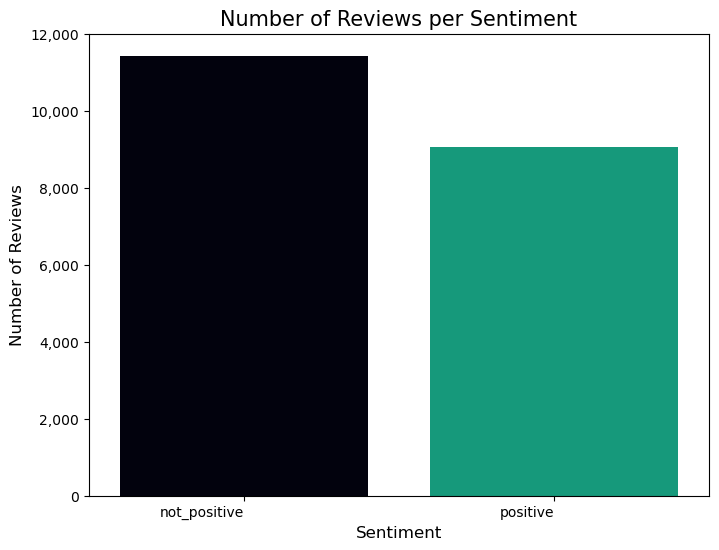

In [24]:
from matplotlib.ticker import FuncFormatter
# Creating a function to plot the number of reviews by sentiment

# Defining custom colors 
custom_colors = ['#00000F', '#00AF87']

def plot_sentiment_count(df, x, label_rotation):
    # Defining the figure
    fig, ax = plt.subplots(figsize=(8,6))
    
    # Plotting the count of reviews 
    sns.countplot(data=df, x=x, order=df[x].value_counts().index, palette=custom_colors)
    
    # Defining the labels and titles
    ax.set_xlabel(xlabel = 'Sentiment', fontsize=12)
    ax.set_ylabel(ylabel = 'Number of Reviews', fontsize=12)
    ax.set_title(f'Number of Reviews per Sentiment', fontsize=15)
    
    # Recording the sentiment values to use them as labels 
    sentiment_labels = df[x].unique()
    
    # Setting the x-axis tick labels to the sentiment labels 
    ax.set_xticks(range(len(sentiment_labels)))
    ax.set_xticklabels(labels=sentiment_labels)
    
    
    # Setting a rotation if needed and making it changeable so this can be amended for a presentation
    ax.set_xticklabels(labels=sentiment_labels, rotation=label_rotation, ha='right')
    
    # Formatting the y-axis labels to show thousands 
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '{:,}'.format(int(x))))
    
     # Saving the plot as a PNG with a transparent background
    plt.savefig('images/reviews_per_sentiment.png', transparent=True)
    
    # Showing the plot
    plt.show()

    
plot_sentiment_count(df, 'Sentiment', 0)

### 4. e) Performing a Train-Test Split

The dataset is being divided into two separate subsets: a training set, and a testing (or validation) set. The validation set will allow to assess the performance of the model.

Two parameters are assigned when dividing the dataset:
* random_state=42
    * setting a random seed of 42 ensures that the data split is reproducible
* stratify=y
    * stratified sampling ensures the class distribution is maintained in both sets to address potential class imbalance issues

In [25]:
# Splitting df into X and y
X = df.drop('Sentiment', axis=1)
y = df['Sentiment']

In [26]:
# Performing a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [27]:
# Inspecting the X_train data
X_train.head()

Review  \
11105                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [28]:
# Inspecting the y_train data 
y_train.head()

11105    not_positive
20111    not_positive
10569    not_positive
2637     not_positive
14179    not_positive
Name: Sentiment, dtype: object

* **Distribution of Target**

In [29]:
# Counting the values of sentiment categories   
train_target_counts = pd.DataFrame(y_train.value_counts())
train_target_counts.index.name = 'target name'
train_target_counts.rename(columns={'Sentiment': 'count'}, inplace=True)

# Inspecting the grouped results
train_target_counts

,count
target name,
not_positive,8578
positive,6790


* **Visually Inspecting Features on train and test samples**

In [30]:
# Making a sample of 5 records to display the full text of each
train_sample = X_train.sample(5, random_state=22)
train_sample['label'] = [y_train[val] for val in train_sample.index]
train_sample.style.set_properties(**{'text-align': 'left'})

,Review,Rating,label
4031,"perfect stay staff works hard make sure perfect, small boutique-like hotel rooms clean simple quite comfortable, location not beat, views available rooms stayed does n't matter old san juan right door hotel heart, simple continental breakfast beautiful roof dining area, big bathroom refrigerator, love safe room, accomodating pleasant staff, stay,",4,not_positive
14831,"awesome, received night davanzati gift, awesome gift, fabrizio rest staff great, room asked virtually no noise windows closed, easy walking distance lot major sights, breakfast great,",5,positive
6159,"great value price excellent location great value price excellent location couple minutes walk wakiki corner finest designer stores like dior lv prada indication great location, n't pay attention bs elevators no hassle whatsoever, read reviews expected bad stuff totally untrue, rooms small super clean personnel helpful cleaning ladies absolutely sweet willing make stay pleasant possible, expectations not paying hilton pay budget price expecting 5 star amenities course disappointed, typical hill billy reviews travelled know great place stay great budget location, definitely recommend, ocean view rooms ending 04 15th floor beautiful view make happy,",4,not_positive
5832,"awesome location expect 5 star hotel, travel lot stayed 5 star hotels high prices nyc opt reasonable, sofitel ny easily qualify 5 star opinion, middle nyc blocks time square radio city music hall museum modern art central park shopping 5th avenue great view chrysler building, walked metropolitan museum art museum natural history empire state building union square soho, perfect location tourists, service excellent, clean neat, free internet access printer lobby 24 hours convenient, highly recommended,",5,positive
3724,"aware husband just returned 3 night/4 day stay riu bambu booked apple vacations, flew newark nj punta cana dr usa3000 airlines, flight newark friday july 7th 2 1/2 hours late depart pilot ill replacement fly pittsburgh pa, air flight smooth easy flight attendants did ill assisted passenger rn, no coffee cake, arrival punta cana went smoothly felt welcomed, weather awesome, greeted apple representative boarded bus hotel, say driving home terrible backseat driver, bus ride horrible large charter bus passed right passed, atleast dozen vehicles narrow crowded road hotel, view outside bus window heart wrenching, 40 minute ride complete poverty, feel greedy vacation, riu hotel bambu macao palace walled compound safety sake property, bambu attractive, not dropped not noticed, check-in easy lobby beautiful given cold hawaiian punch wine glass nice, hotel staff friendly, room unfortunately far away 2805 dissapointment floor, specifically requested balcony apple reviews read mold, luckily room smelled fine smoking room fault completely forgot request non-smoking truly smelled fine, brought box bounce just case did use drawers closets, room clean bug free, checked fridge no gallon water no beer no soda seconds hand wall hand wet paint, dialed o talk desk looking waste n't communicated no answer, husband hotel worker showed minutes warm lot drinks fridge, room cool a/c worked fine froze beds night, language barrier issue basics n't going pull english spanish dictionary say hand wet paint requested balcony really prefer non-smoking room let lot things, warning fence outside room barbed wire noticed businesses passed bus ride hotel, means need alert aware surroundings, headed eat mamajuana choice awful, bad review read food absolutely 100 true, no matter eat bad, wo n't rehash, let just say remember mini market bottled water soda chips, worth paying, conversion rate 32 cents dollar, just tell cashier want pay dollars, husband spent 3rd 4th day trip running bathroom bed, having issues, did not drink drop water, blame food, bring lots immodium, beach gorgeous pool nice wo n't lie clean condom floated jacuzzi got, issue constant selling goods services annoying begin cringe hea

In [31]:
# Making a sample of 5 records to display the full text of each
test_sample = X_test.sample(5, random_state=22)
test_sample['label'] = [y_test[val] for val in test_sample.index]
test_sample.style.set_properties(**{'text-align': 'left'})

## 4: 2- <u>Data Preprocessing & Exploratory Analysis</u>

----------TO REVIEW--------------------TO REVIEW--------------------TO REVIEW--------------------TO REVIEW--------------------TO REVIEW--------------------TO REVIEW--------------------TO REVIEW--------------------TO REVIEW--------------------TO REVIEW--------------------TO REVIEW--------------------TO REVIEW--------------------TO REVIEW--------------------TO REVIEW--------------------TO REVIEW----------

In order to preprocess the tweets, the following transformations were performed: 
* **Standardizing case**
    <br>This step was verified as it is important to ensure text is uniform and consistent. Nevertheless, no extra step was taken as text was already saved as lower case.

* **Character Encoding**
    <br> This was done to ensure consistent representation of text by transforming non-text characters into a normalized format, which will facilitate proper text processing, analysis, and model training.
    
* **Tokenizing**
    <br>Tokens of words were created. This was done with the `RegexpTokenizer` package from nltk.tokenize. This step will facilitate the conversion of word into a suitable form for analysis and modeling.  <br>
* **Stopwords** 
    <br>To focus on the data's theme, English stopwords were removed. Manual additions were made in this text's context (i.e. "sxsw", "mention")  
* **Lemmatize** 
    <br> The `WordNetLemmatizer` package from nltk.stem.wordnet was used to reduce words to their base form, allowing a more accurate analysis
* **Frequency Distribution**
    <br>The `FreqDist` package was used to review in a dictionary-like output, the words and their frequencies
* **WordCloud**
    <br> The words' frequencies were represented visually thanks to the `WordCloud` package
* **Bigrams**
    <br> Bigrams were drawn to have a better understanding of the themes, i.e. pop was identified with pop-up store, thanks to the `collocations` package and its BigramAssocMeasures
* **Mutual Information Scores**
    <br> Bigrams that occur more than 5 times were examined through `mutual information scores`

Before any transformation is done, a copy of the tweet column will be done so the original one can always be accessed. 

----------TO REVIEW--------------------TO REVIEW--------------------TO REVIEW--------------------TO REVIEW--------------------TO REVIEW--------------------TO REVIEW--------------------TO REVIEW--------------------TO REVIEW--------------------TO REVIEW--------------------TO REVIEW--------------------TO REVIEW--------------------TO REVIEW--------------------TO REVIEW--------------------TO REVIEW----------

In [32]:
# Duplicating the column review
X_train['original_review'] = X_train['Review']

In [33]:
# Verifying the new column was correctly created
X_train.head()

Review  \
11105                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

### 4: 2- a) Standardizing Case

We will glance at the first sample of review to get an idea of whether we need to standardize case. This step is important to ensure text is standardized, to prevent models from treating words with different cases as different ones

In [34]:
# Isolating the first tweet into windows_sample
sample_review = train_sample.iloc[1]['Review']
sample_review

'awesome, received night davanzati gift, awesome gift, fabrizio rest staff great, room asked virtually no noise windows closed, easy walking distance lot major sights, breakfast great,  '

* **Lower case**

Changing to lower case is not necessary, it looks like it was already done. We will verify whether this is the case.

In [35]:
# # Checking that all reviews are in lowercase
# all_lowercase = X_train['Review'].str.islower().all()

# print('The assumption that all reviews are in lowercase is '+ str(all_lowercase))

In [36]:
# Checking that all reviews are in lowercase
def is_lowercase(df_column):
    is_lower = df_column.str.islower().all()
    print('The assumption that all reviews are in lowercase is '+ str(is_lower))
    
is_lowercase(X_train['Review'])

The assumption that all reviews are in lowercase is False


It seemed clear that all the text was lowercase though. Let's filter on the reviews that were not, out of curiosity and extra verification. 

In [37]:
# Creating a sample to filter on reviews that were not in lowercase 
special_characters_sample = X_train[~X_train['Review'].str.islower()][:2]
other_special_characters_sample = X_train[~X_train['Review'].str.islower()][10:12]
special_characters_sample

Review  \
20111  concerns not warranted breezes 25 years old just returned week stay breezes resort girlfriend, arrived december 30 returned january 14 2005. read reviews breezes arrived resort admit fairly worried quality hotel, try answer questions arriving resort.hurrican damage repairs going days notice, services fully running grounds beautiful, no avoid resort hurricane damage, check arrived hotel 10:00 approximately 150 people expect hotel check did time, took hour everybody checked hotel longer usual check time average north american hotel largely result person spending minutes arguing waterfront room, waiting hotel staff friendly provided drinks walk nearby bar order wanted, got checked given room number told room not ready 3pm, hotel staff assured look bags return 3. returned 3 room ready luggage good order, hotel staff insisted carry luggage room did promptly, requested waterfront room did not night told come day am.hotel room room disappointing missing advertised features coffee maker iron view impressive facing parking lot, pool area beach beautiful really did n't care quality room fact retrospect bad, day promised moved waterfront room, hotel clearly place like waterfront room, ensures wants waterfront room portion stay, large groups people checking day opening waterfront rooms request moved, heard no spent nights non waterfront room moved, new room great amazing view pool ocean nice furnished deck, room illustrated website kept clean staff, mini bar restocked daily ample pop water, room good iron coffee maker, occasions mini bar not restocked day got new towel, easily rectified quick phone desk hour water pop wanted lots towels, did n't watch tv english channels including movie channels, overall room fairly plain kept clean view definitely star, considering going not expect waterfront room night, want ask desk staff make note like room, make sure right manage requests ensures moved room choice, watch right info moved day two.every room safe inches wide inches high inches deep, kept valuables safe rooms did secure hotel, not leave money lying inside don__Ã_Ã©_ think laptop kept bag not room stolen, lap definitely not fit inside safe, restaurants ate twice restaurants, favourites marlin mexican japanese good, restaurant meals course food pretty good, food similar quality average family restaurant n't think disappointed having paid 15 20 dollars person meals canada excluding alcohol, wine replenished frequently similar quality average 9 dollar bottle wine, did n't want wine bar available service prompt.one word advice restaurants want just ask, pretty wanted just ask, want entree__Ã_Ã©_ dinner entree__Ã_Ã©_, want bottle wine left table bottle room you.buffet good wide variety food different theme night, food generally hot easily competed high end buffet canada usa, waiters buffet bring drinks quickly ordered did not come table right away simply ask promptly.there poolside barbecue going afternoon fish burgers chicken steak pork chops, steak tended little tough rest quite good barbecue grilled fried, fried stuff barbecue tended little greasy barbecued stuff waited minutes.24 hour restaurant okay similar quality mcdonalds that__Ã_Ã©_ really intended, just quick snack, burgers chicken burgers calamari fries spring rolls pizza etc.my girlfriend sensitive stomach sick nor ate, did not sick food good.i did hear people complain lack healthy food, did not think complaint really warranted, ton unhealthy food lots healthy stuff just exercise self control, tons fruit vegetables salads available, egg white omelets asked, buffet lots fat free yogurt cereal diet pop available mini bar bars diet pop, restaurant offered chicken fish not fried, gym gym pretty weak poorly maintained designed light work, heaviest dumb bells fifty pounds etc.internetinternet worked little slow not painful, cost varies number minutes purchased 15 u.s. bought 90 minutes.storeprices hotel stores expensive no different hotel store north america, did no

The uppercase text is actually characters that are incorrectly translated. We opened the file with the latin-1 encoding, let's try utf-8 as encoding the review if this resolves this. 

In [38]:
# Saving the index of the special_characters_sample to verify them in the future
spec_char_indices = special_characters_sample.index

In [39]:
# Loading dataset and saving it as raw_df
utf8_df = pd.read_csv('data/tripadvisor_hotel_reviews.csv.zip', compression="zip", encoding='utf-8')

In [40]:
# Checking that all reviews are in lowercase
is_lowercase(utf8_df['Review'])

The assumption that all reviews are in lowercase is False


In [41]:
# Inspecting 2 reviews that caused the reviews not to be lowercase
utf8_df.loc[spec_char_indices]

Review  \
20111  concerns not warranted breezes 25 years old just returned week stay breezes resort girlfriend, arrived december 30 returned january 14 2005. read reviews breezes arrived resort admit fairly worried quality hotel, try answer questions arriving resort.hurrican damage repairs going days notice, services fully running grounds beautiful, no avoid resort hurricane damage, check arrived hotel 10:00 approximately 150 people expect hotel check did time, took hour everybody checked hotel longer usual check time average north american hotel largely result person spending minutes arguing waterfront room, waiting hotel staff friendly provided drinks walk nearby bar order wanted, got checked given room number told room not ready 3pm, hotel staff assured look bags return 3. returned 3 room ready luggage good order, hotel staff insisted carry luggage room did promptly, requested waterfront room did not night told come day am.hotel room room disappointing missing advertised features coffee maker iron view impressive facing parking lot, pool area beach beautiful really did n't care quality room fact retrospect bad, day promised moved waterfront room, hotel clearly place like waterfront room, ensures wants waterfront room portion stay, large groups people checking day opening waterfront rooms request moved, heard no spent nights non waterfront room moved, new room great amazing view pool ocean nice furnished deck, room illustrated website kept clean staff, mini bar restocked daily ample pop water, room good iron coffee maker, occasions mini bar not restocked day got new towel, easily rectified quick phone desk hour water pop wanted lots towels, did n't watch tv english channels including movie channels, overall room fairly plain kept clean view definitely star, considering going not expect waterfront room night, want ask desk staff make note like room, make sure right manage requests ensures moved room choice, watch right info moved day two.every room safe inches wide inches high inches deep, kept valuables safe rooms did secure hotel, not leave money lying inside don__Ç_é_ think laptop kept bag not room stolen, lap definitely not fit inside safe, restaurants ate twice restaurants, favourites marlin mexican japanese good, restaurant meals course food pretty good, food similar quality average family restaurant n't think disappointed having paid 15 20 dollars person meals canada excluding alcohol, wine replenished frequently similar quality average 9 dollar bottle wine, did n't want wine bar available service prompt.one word advice restaurants want just ask, pretty wanted just ask, want entree__Ç_é_ dinner entree__Ç_é_, want bottle wine left table bottle room you.buffet good wide variety food different theme night, food generally hot easily competed high end buffet canada usa, waiters buffet bring drinks quickly ordered did not come table right away simply ask promptly.there poolside barbecue going afternoon fish burgers chicken steak pork chops, steak tended little tough rest quite good barbecue grilled fried, fried stuff barbecue tended little greasy barbecued stuff waited minutes.24 hour restaurant okay similar quality mcdonalds that__Ç_é_ really intended, just quick snack, burgers chicken burgers calamari fries spring rolls pizza etc.my girlfriend sensitive stomach sick nor ate, did not sick food good.i did hear people complain lack healthy food, did not think complaint really warranted, ton unhealthy food lots healthy stuff just exercise self control, tons fruit vegetables salads available, egg white omelets asked, buffet lots fat free yogurt cereal diet pop available mini bar bars diet pop, restaurant offered chicken fish not fried, gym gym pretty weak poorly maintained designed light work, heaviest dumb bells fifty pounds etc.internetinternet worked little slow not painful, cost varies number minutes purchased 15 u.s. bought 90 minutes.storeprices hotel stores expensive no different hotel store north america, did not rumore

Whether we open the file with encoding `utf-8` or `latin-1`, we get the same results. We went in and checked the data source: it does contain these special characters from the source. 

### 4: 2- b) Character Encoding

We will then opt to keep the initial encoding of `df` and remove the special characters manually.
The next section will encode characters which are coming up so they don't affect modeling.

In [42]:
# Recall the previously created special_characters_reviews
special_characters_sample

Review  \
20111  concerns not warranted breezes 25 years old just returned week stay breezes resort girlfriend, arrived december 30 returned january 14 2005. read reviews breezes arrived resort admit fairly worried quality hotel, try answer questions arriving resort.hurrican damage repairs going days notice, services fully running grounds beautiful, no avoid resort hurricane damage, check arrived hotel 10:00 approximately 150 people expect hotel check did time, took hour everybody checked hotel longer usual check time average north american hotel largely result person spending minutes arguing waterfront room, waiting hotel staff friendly provided drinks walk nearby bar order wanted, got checked given room number told room not ready 3pm, hotel staff assured look bags return 3. returned 3 room ready luggage good order, hotel staff insisted carry luggage room did promptly, requested waterfront room did not night told come day am.hotel room room disappointing missing advertised features coffee maker iron view impressive facing parking lot, pool area beach beautiful really did n't care quality room fact retrospect bad, day promised moved waterfront room, hotel clearly place like waterfront room, ensures wants waterfront room portion stay, large groups people checking day opening waterfront rooms request moved, heard no spent nights non waterfront room moved, new room great amazing view pool ocean nice furnished deck, room illustrated website kept clean staff, mini bar restocked daily ample pop water, room good iron coffee maker, occasions mini bar not restocked day got new towel, easily rectified quick phone desk hour water pop wanted lots towels, did n't watch tv english channels including movie channels, overall room fairly plain kept clean view definitely star, considering going not expect waterfront room night, want ask desk staff make note like room, make sure right manage requests ensures moved room choice, watch right info moved day two.every room safe inches wide inches high inches deep, kept valuables safe rooms did secure hotel, not leave money lying inside don__Ã_Ã©_ think laptop kept bag not room stolen, lap definitely not fit inside safe, restaurants ate twice restaurants, favourites marlin mexican japanese good, restaurant meals course food pretty good, food similar quality average family restaurant n't think disappointed having paid 15 20 dollars person meals canada excluding alcohol, wine replenished frequently similar quality average 9 dollar bottle wine, did n't want wine bar available service prompt.one word advice restaurants want just ask, pretty wanted just ask, want entree__Ã_Ã©_ dinner entree__Ã_Ã©_, want bottle wine left table bottle room you.buffet good wide variety food different theme night, food generally hot easily competed high end buffet canada usa, waiters buffet bring drinks quickly ordered did not come table right away simply ask promptly.there poolside barbecue going afternoon fish burgers chicken steak pork chops, steak tended little tough rest quite good barbecue grilled fried, fried stuff barbecue tended little greasy barbecued stuff waited minutes.24 hour restaurant okay similar quality mcdonalds that__Ã_Ã©_ really intended, just quick snack, burgers chicken burgers calamari fries spring rolls pizza etc.my girlfriend sensitive stomach sick nor ate, did not sick food good.i did hear people complain lack healthy food, did not think complaint really warranted, ton unhealthy food lots healthy stuff just exercise self control, tons fruit vegetables salads available, egg white omelets asked, buffet lots fat free yogurt cereal diet pop available mini bar bars diet pop, restaurant offered chicken fish not fried, gym gym pretty weak poorly maintained designed light work, heaviest dumb bells fifty pounds etc.internetinternet worked little slow not painful, cost varies number minutes purchased 15 u.s. bought 90 minutes.storeprices hotel stores expensive no different hotel store north america, did no

We will try to encode these characters by normalizing the Unicode string using NFKD (Normalization Form Compatibility Decompostition). 
After the string is normalized, they are encoded to ASCII and any characters that cannot be represented will be ignored, and then it is encoded back to latin-1.

In [43]:
# Importing the relevant package
import unicodedata

# Applying the lambda function to normalize the characters. 
special_characters_sample['Review'] = special_characters_sample['Review'].apply(lambda x: unicodedata.normalize('NFKD', x). encode('ascii', 'ignore').decode('latin-1'))

In [44]:
special_characters_sample

Review  \
20111  concerns not warranted breezes 25 years old just returned week stay breezes resort girlfriend, arrived december 30 returned january 14 2005. read reviews breezes arrived resort admit fairly worried quality hotel, try answer questions arriving resort.hurrican damage repairs going days notice, services fully running grounds beautiful, no avoid resort hurricane damage, check arrived hotel 10:00 approximately 150 people expect hotel check did time, took hour everybody checked hotel longer usual check time average north american hotel largely result person spending minutes arguing waterfront room, waiting hotel staff friendly provided drinks walk nearby bar order wanted, got checked given room number told room not ready 3pm, hotel staff assured look bags return 3. returned 3 room ready luggage good order, hotel staff insisted carry luggage room did promptly, requested waterfront room did not night told come day am.hotel room room disappointing missing advertised features coffee maker iron view impressive facing parking lot, pool area beach beautiful really did n't care quality room fact retrospect bad, day promised moved waterfront room, hotel clearly place like waterfront room, ensures wants waterfront room portion stay, large groups people checking day opening waterfront rooms request moved, heard no spent nights non waterfront room moved, new room great amazing view pool ocean nice furnished deck, room illustrated website kept clean staff, mini bar restocked daily ample pop water, room good iron coffee maker, occasions mini bar not restocked day got new towel, easily rectified quick phone desk hour water pop wanted lots towels, did n't watch tv english channels including movie channels, overall room fairly plain kept clean view definitely star, considering going not expect waterfront room night, want ask desk staff make note like room, make sure right manage requests ensures moved room choice, watch right info moved day two.every room safe inches wide inches high inches deep, kept valuables safe rooms did secure hotel, not leave money lying inside don__A_A_ think laptop kept bag not room stolen, lap definitely not fit inside safe, restaurants ate twice restaurants, favourites marlin mexican japanese good, restaurant meals course food pretty good, food similar quality average family restaurant n't think disappointed having paid 15 20 dollars person meals canada excluding alcohol, wine replenished frequently similar quality average 9 dollar bottle wine, did n't want wine bar available service prompt.one word advice restaurants want just ask, pretty wanted just ask, want entree__A_A_ dinner entree__A_A_, want bottle wine left table bottle room you.buffet good wide variety food different theme night, food generally hot easily competed high end buffet canada usa, waiters buffet bring drinks quickly ordered did not come table right away simply ask promptly.there poolside barbecue going afternoon fish burgers chicken steak pork chops, steak tended little tough rest quite good barbecue grilled fried, fried stuff barbecue tended little greasy barbecued stuff waited minutes.24 hour restaurant okay similar quality mcdonalds that__A_A_ really intended, just quick snack, burgers chicken burgers calamari fries spring rolls pizza etc.my girlfriend sensitive stomach sick nor ate, did not sick food good.i did hear people complain lack healthy food, did not think complaint really warranted, ton unhealthy food lots healthy stuff just exercise self control, tons fruit vegetables salads available, egg white omelets asked, buffet lots fat free yogurt cereal diet pop available mini bar bars diet pop, restaurant offered chicken fish not fried, gym gym pretty weak poorly maintained designed light work, heaviest dumb bells fifty pounds etc.internetinternet worked little slow not painful, cost varies number minutes purchased 15 u.s. bought 90 minutes.storeprices hotel stores expensive no different hotel store north america, did not rumore

This helped. Now, our special characters are replaced by `__A_A_`. We will remove them from the reviews on the next cell. 

In [45]:
# Removing __A_A_ from reviews
special_characters_sample['Review'] = special_characters_sample['Review'].str.replace('__A_A_', '')

In [46]:
# Verifying it removed it
special_characters_sample

Review  \
20111  concerns not warranted breezes 25 years old just returned week stay breezes resort girlfriend, arrived december 30 returned january 14 2005. read reviews breezes arrived resort admit fairly worried quality hotel, try answer questions arriving resort.hurrican damage repairs going days notice, services fully running grounds beautiful, no avoid resort hurricane damage, check arrived hotel 10:00 approximately 150 people expect hotel check did time, took hour everybody checked hotel longer usual check time average north american hotel largely result person spending minutes arguing waterfront room, waiting hotel staff friendly provided drinks walk nearby bar order wanted, got checked given room number told room not ready 3pm, hotel staff assured look bags return 3. returned 3 room ready luggage good order, hotel staff insisted carry luggage room did promptly, requested waterfront room did not night told come day am.hotel room room disappointing missing advertised features coffee maker iron view impressive facing parking lot, pool area beach beautiful really did n't care quality room fact retrospect bad, day promised moved waterfront room, hotel clearly place like waterfront room, ensures wants waterfront room portion stay, large groups people checking day opening waterfront rooms request moved, heard no spent nights non waterfront room moved, new room great amazing view pool ocean nice furnished deck, room illustrated website kept clean staff, mini bar restocked daily ample pop water, room good iron coffee maker, occasions mini bar not restocked day got new towel, easily rectified quick phone desk hour water pop wanted lots towels, did n't watch tv english channels including movie channels, overall room fairly plain kept clean view definitely star, considering going not expect waterfront room night, want ask desk staff make note like room, make sure right manage requests ensures moved room choice, watch right info moved day two.every room safe inches wide inches high inches deep, kept valuables safe rooms did secure hotel, not leave money lying inside don think laptop kept bag not room stolen, lap definitely not fit inside safe, restaurants ate twice restaurants, favourites marlin mexican japanese good, restaurant meals course food pretty good, food similar quality average family restaurant n't think disappointed having paid 15 20 dollars person meals canada excluding alcohol, wine replenished frequently similar quality average 9 dollar bottle wine, did n't want wine bar available service prompt.one word advice restaurants want just ask, pretty wanted just ask, want entree dinner entree, want bottle wine left table bottle room you.buffet good wide variety food different theme night, food generally hot easily competed high end buffet canada usa, waiters buffet bring drinks quickly ordered did not come table right away simply ask promptly.there poolside barbecue going afternoon fish burgers chicken steak pork chops, steak tended little tough rest quite good barbecue grilled fried, fried stuff barbecue tended little greasy barbecued stuff waited minutes.24 hour restaurant okay similar quality mcdonalds that really intended, just quick snack, burgers chicken burgers calamari fries spring rolls pizza etc.my girlfriend sensitive stomach sick nor ate, did not sick food good.i did hear people complain lack healthy food, did not think complaint really warranted, ton unhealthy food lots healthy stuff just exercise self control, tons fruit vegetables salads available, egg white omelets asked, buffet lots fat free yogurt cereal diet pop available mini bar bars diet pop, restaurant offered chicken fish not fried, gym gym pretty weak poorly maintained designed light work, heaviest dumb bells fifty pounds etc.internetinternet worked little slow not painful, cost varies number minutes purchased 15 u.s. bought 90 minutes.storeprices hotel stores expensive no different hotel store north america, did not rumored pepto bismol sale 30, 

Great, this resolved it. We will save the steps into a function and will apply it to the full train data 

In [47]:
# Creating the function character_encoding to handle them 

def character_encoding(df_column):
    # Importing the relevant package
    import unicodedata
    
    # Normalizing characters 
    df_column = df_column.apply(lambda x: unicodedata.normalize('NFKD', x). encode('ascii', 'ignore').decode('latin-1'))
    
    # Defining the list of characters to remove 
    characters_to_remove = ['__A_AA', '__A_A_', '__AA', '__A', '_Aow__', 'AAA', '_A', 'A_', '__hat', 'A', '__']
    
    
    # Removing the characters from text
    for char in characters_to_remove:
        df_column = df_column.str.replace(char, '')
    
    # Returning the df_column
    return df_column 

    

We could now apply it to our full X_train['Review'] column directly, as we kept an unmodified copy as the original.
We later defined a function combining all preprocessing steps, so the next cells will be commented out.

In [48]:
# Reviewing the other sample
other_special_characters_sample

,Review,Rating,original_review
3233,"myths scuba diving want clear myths add new topic reviews, not going re-state lot things written, let say great time, parents sister cousin wife kids age 2 4 party, myth 1. not lot fresh water drink lack water bottles, reality everyday room cleaned new 2-liter bottles water room, myth 2. chairs near pool easy obtain 9 10, reality chairs near shallow young kid section taken 7:15am, parents drop towels books chairs way breakfast, couple mornings group dads walking fast reserve group chairs gone, ca n't speak deeper end pool.myth 3. french rude, reality really nice spoke english, n't know saying french really didn__Ã_Ã©_ care.myth 4. topless beach, reality saw women topless pool, quite liked actually, women stopped practice 30 years ago.as far diving club med ok dive sites 5 minutes boat ride resort, terrain flat 50 feet deep coral rising 10 feet in-between sand channels, no walls, lots hard soft corals lacking wide range colors, average number fish no big schools fish, visibility 75 feet, did eagle ray big stingray flounder, nothing special, reminded boring dives bonaire minus wall, decided n't worth 55 dollars lady rear entried head, oh yea did mention rented gear included 55 none regs depth gauges, tagged dive master, depth gauge__ÃÃ®__ut n't let deter dives like guided underwater tour, dive occasionally want refresh skills try,",4,"myths scuba diving want clear myths add new topic reviews, not going re-state lot things written, let say great time, parents sister cousin wife kids age 2 4 party, myth 1. not lot fresh water drink lack water bottles, reality everyday room cleaned new 2-liter bottles water room, myth 2. chairs near pool easy obtain 9 10, reality chairs near shallow young kid section taken 7:15am, parents drop towels books chairs way breakfast, couple mornings group dads walking fast reserve group chairs gone, ca n't speak deeper end pool.myth 3. french rude, reality really nice spoke english, n't know saying french really didn__Ã_Ã©_ care.myth 4. topless beach, reality saw women topless pool, quite liked actually, women stopped practice 30 years ago.as far diving club med ok dive sites 5 minutes boat ride resort, terrain flat 50 feet deep coral rising 10 feet in-between sand channels, no walls, lots hard soft corals lacking wide range colors, average number fish no big schools fish, visibility 75 feet, did eagle ray big stingray flounder, nothing special, reminded boring dives bonaire minus wall, decided n't worth 55 dollars lady rear entried head, oh yea did mention rented gear included 55 none regs depth gauges, tagged dive master, depth gauge__ÃÃ®__ut n't let deter dives like guided underwater tour, dive occasionally want refresh skills try,"
18848,"definitely return, just returned 5 day stay mar 16-20 paradisus palma real family fiancÂÂÃe. traveling different islands caribbean staying various hotels say paradisus beautiful hotel, beach beach clean seaweed not big problem, lay regular lounge chairs ask beach, not want directly sun lay huts beach, pools different pools not cold complained, jacuzzis pools temperature pool water, want hot jacuzzi visit area hut 4 different warm/hot jacuzzis not directly sun, restaurants variety restaurants choose, asian italian mexican buffet outdoor grill ones tried, food not 5-star quality not awful, variety restaurants offered, ambiance hotel gorgeous ambiance seen, brand new hotel clean modern looking, dÂÂÃcor absolutely stunning lit night fall love hotel, rooms room gorgeous large, bathroom large true not privacy room bathroom note, room plasma tv fiancÂÂÃe enjoyed sitting area sofa 2 chairs small table 2 chairs, balcony average size hotel balcony, nightlife looking great nightlife not resort, small casino lounge/bar onyx places basically night, onyx nice i__Ã_Ã©Â sure time busier people hotel, royal service family opted royal service point time say not necessary, hotel new not operating maximum capacity not huge crowd hotel

In [49]:
character_encoding(other_special_characters_sample['Review'])

3233                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               myths scuba diving want clear myths add new topic reviews, not going re-state lot things written, let say great time, parents sister cousin wife kids age 2 4 party, myth 1. not lot fresh water drink lack water bottles, reality everyday room cleaned new 2-liter bottles water room, myth 2. chairs near pool easy obtain 9 10, reality chairs near shallow young kid section taken 7:15am, paren

In [50]:
# Calling the function on full X_train 
# X_train['Review'] = character_encoding(X_train['Review'])

In [51]:
# X_train[~X_train['Review'].str.islower()]

In [52]:
# Verifying that words containing 'a' lowercase were not removed
# assert len(X_train[X_train['Review'].str.contains('stay')]) > 0

In [53]:
# Verifying that our sample reviews are correctly handled now 
# X_train.loc[spec_char_indices]

In [54]:
# Verifying that we correctly have lowercase everywhere 
# is_lowercase(X_train['Review'])

This now resolved it and gave us the result we hoped for. 
We can move on to the next step. 

### 4: 2- c) Tokenizing

Tokenizing text data is one of the fundamental data cleaning steps to further convert words into a suitable form for analysis and modeling.

In [55]:
# Reviewing one of our sample of 2 reviews 
special_characters_sample

Review  \
20111  concerns not warranted breezes 25 years old just returned week stay breezes resort girlfriend, arrived december 30 returned january 14 2005. read reviews breezes arrived resort admit fairly worried quality hotel, try answer questions arriving resort.hurrican damage repairs going days notice, services fully running grounds beautiful, no avoid resort hurricane damage, check arrived hotel 10:00 approximately 150 people expect hotel check did time, took hour everybody checked hotel longer usual check time average north american hotel largely result person spending minutes arguing waterfront room, waiting hotel staff friendly provided drinks walk nearby bar order wanted, got checked given room number told room not ready 3pm, hotel staff assured look bags return 3. returned 3 room ready luggage good order, hotel staff insisted carry luggage room did promptly, requested waterfront room did not night told come day am.hotel room room disappointing missing advertised features coffee maker iron view impressive facing parking lot, pool area beach beautiful really did n't care quality room fact retrospect bad, day promised moved waterfront room, hotel clearly place like waterfront room, ensures wants waterfront room portion stay, large groups people checking day opening waterfront rooms request moved, heard no spent nights non waterfront room moved, new room great amazing view pool ocean nice furnished deck, room illustrated website kept clean staff, mini bar restocked daily ample pop water, room good iron coffee maker, occasions mini bar not restocked day got new towel, easily rectified quick phone desk hour water pop wanted lots towels, did n't watch tv english channels including movie channels, overall room fairly plain kept clean view definitely star, considering going not expect waterfront room night, want ask desk staff make note like room, make sure right manage requests ensures moved room choice, watch right info moved day two.every room safe inches wide inches high inches deep, kept valuables safe rooms did secure hotel, not leave money lying inside don think laptop kept bag not room stolen, lap definitely not fit inside safe, restaurants ate twice restaurants, favourites marlin mexican japanese good, restaurant meals course food pretty good, food similar quality average family restaurant n't think disappointed having paid 15 20 dollars person meals canada excluding alcohol, wine replenished frequently similar quality average 9 dollar bottle wine, did n't want wine bar available service prompt.one word advice restaurants want just ask, pretty wanted just ask, want entree dinner entree, want bottle wine left table bottle room you.buffet good wide variety food different theme night, food generally hot easily competed high end buffet canada usa, waiters buffet bring drinks quickly ordered did not come table right away simply ask promptly.there poolside barbecue going afternoon fish burgers chicken steak pork chops, steak tended little tough rest quite good barbecue grilled fried, fried stuff barbecue tended little greasy barbecued stuff waited minutes.24 hour restaurant okay similar quality mcdonalds that really intended, just quick snack, burgers chicken burgers calamari fries spring rolls pizza etc.my girlfriend sensitive stomach sick nor ate, did not sick food good.i did hear people complain lack healthy food, did not think complaint really warranted, ton unhealthy food lots healthy stuff just exercise self control, tons fruit vegetables salads available, egg white omelets asked, buffet lots fat free yogurt cereal diet pop available mini bar bars diet pop, restaurant offered chicken fish not fried, gym gym pretty weak poorly maintained designed light work, heaviest dumb bells fifty pounds etc.internetinternet worked little slow not painful, cost varies number minutes purchased 15 u.s. bought 90 minutes.storeprices hotel stores expensive no different hotel store north america, did not rumored pepto bismol sale 30, 

We will use `RegexpTokenizer` from NLTK to create tokens of tow or more consecutive word characters, which include letters, numbers and underscores.

* **Tokenizing Pattern**

In [56]:
# Importing RegexpTokenizer
from nltk.tokenize import RegexpTokenizer

basic_token_pattern = r"(?u)\b\w\w+\b"

# Instantiating the tokenizer
tokenizer = RegexpTokenizer(basic_token_pattern)

# Tokenizing the tweets
special_characters_sample['Review'] = special_characters_sample['Review'].apply(lambda x: tokenizer.tokenize(x))
special_characters_sample['Review']

20111    [concerns, not, warranted, breezes, 25, years, old, just, returned, week, stay, breezes, resort, girlfriend, arrived, december, 30, returned, january, 14, 2005, read, reviews, breezes, arrived, resort, admit, fairly, worried, quality, hotel, try, answer, questions, arriving, resort, hurrican, damage, repairs, going, days, notice, services, fully, running, grounds, beautiful, no, avoid, resort, hurricane, damage, check, arrived, hotel, 10, 00, approximately, 150, people, expect, hotel, check, did, time, took, hour, everybody, checked, hotel, longer, usual, check, time, average, north, american, hotel, largely, result, person, spending, minutes, arguing, waterfront, room, waiting, hotel, staff, friendly, provided, drinks, walk, nearby, bar, order, wanted, got, checked, given, ...]
19063                               [stay, bali, did, tour, bali, pretty, went, ellies, fantastic, place, start, david, caroline, really, set, perfectly, spent, nights, really, did, feel, like, home, a

We could now apply it to our full X_train['Review'] column directly, as we kept an unmodified copy as the original.  
We later defined a function combining all preprocessing steps, so the next cells will be commented out. 

In [57]:
# Applying the tokenizer on the full train data
# X_train['Review'] = X_train['Review'].apply(lambda x: tokenizer.tokenize(x))

In [58]:
# Inspecting it
# X_train.head()

### 4: 2- d) Stopwords

Then, we will be removing stopwords so we can focus on the the text data's theme. It looked like the text was somewhat preprocessed, so we will review whether there is a need to further extract Stopwords

This step will not be applied to the full X_train data, as we will use it separately to test whether it positively impacts our model in the future when we reach this step. 

Typical list of stopwords to which we will add:
* `sxsw`: the name of the conference 
* `mention`: when tweeted
* `link`: ?
* `RT`: retweet 

In [59]:
# Importing relevant packages
import nltk
nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords

# Creating list to store stopwords
stopwords_list = stopwords.words('english')
stopwords_list[:5]

['i', 'me', 'my', 'myself', 'we']

We will continue using our previously created special_characters_sample

In [60]:
special_characters_sample

Review  \
20111  [concerns, not, warranted, breezes, 25, years, old, just, returned, week, stay, breezes, resort, girlfriend, arrived, december, 30, returned, january, 14, 2005, read, reviews, breezes, arrived, resort, admit, fairly, worried, quality, hotel, try, answer, questions, arriving, resort, hurrican, damage, repairs, going, days, notice, services, fully, running, grounds, beautiful, no, avoid, resort, hurricane, damage, check, arrived, hotel, 10, 00, approximately, 150, people, expect, hotel, check, did, time, took, hour, everybody, checked, hotel, longer, usual, check, time, average, north, american, hotel, largely, result, person, spending, minutes, arguing, waterfront, room, waiting, hotel, staff, friendly, provided, drinks, walk, nearby, bar, order, wanted, got, checked, given, ...]   
19063                             [stay, bali, did, tour, bali, pretty, went, ellies, fantastic, place, start, david, caroline, really, set, perfectly, spent, nights, really, did, feel, like, home, away, home, gave, chance, grounding, bali, sense, feel, place, set, adventure, ideal, david, really, dons, advice, proved, invaluable, number, occasions, certainly, not, trouble, free, totally, enjoyable, experience, david, set, moped, hire, certainly, recommend, southern, tip, bali, jimberan, dreamlands, ulu, watu, kuta, seminyak, easy, reach, moped, places, experience, bali, ku, ta, bar, seminyak, particular, recommendation, sunset, drinks, trendy, crowd, cool, chill, music, bike, days, exploring, areas, david, took, care, organising, car, hire, cool, little, jeep, took, ubud, really, ...]   

       Rating  \
20111       4   
19063       5   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [61]:
# Defining function that takes in a list of strings and returns only those that are not in the list
def remove_stopwords(token_list, stopwords_list):
    stopwords_removed = [token for token in token_list if token not in stopwords_list]
    return stopwords_removed


In [62]:
# Testing it on the tokens example
tokens_example = special_characters_sample.iloc[0]['Review']
print("Length with stopwords: ", len(tokens_example))

tokens_example_without_stopwords = remove_stopwords(tokens_example, stopwords_list)
print("Length with stopwords: ", len(tokens_example_without_stopwords))

Length with stopwords:  1279
Length with stopwords:  1192


Despite the assumption, stopwords did exist and could be removed. The length of the review was not highly impacted so the main meaning is less at risk of being impacted. 

In [63]:
# Reviewing token example review 
tokens_example_without_stopwords

['concerns',
 'warranted',
 'breezes',
 '25',
 'years',
 'old',
 'returned',
 'week',
 'stay',
 'breezes',
 'resort',
 'girlfriend',
 'arrived',
 'december',
 '30',
 'returned',
 'january',
 '14',
 '2005',
 'read',
 'reviews',
 'breezes',
 'arrived',
 'resort',
 'admit',
 'fairly',
 'worried',
 'quality',
 'hotel',
 'try',
 'answer',
 'questions',
 'arriving',
 'resort',
 'hurrican',
 'damage',
 'repairs',
 'going',
 'days',
 'notice',
 'services',
 'fully',
 'running',
 'grounds',
 'beautiful',
 'avoid',
 'resort',
 'hurricane',
 'damage',
 'check',
 'arrived',
 'hotel',
 '10',
 '00',
 'approximately',
 '150',
 'people',
 'expect',
 'hotel',
 'check',
 'time',
 'took',
 'hour',
 'everybody',
 'checked',
 'hotel',
 'longer',
 'usual',
 'check',
 'time',
 'average',
 'north',
 'american',
 'hotel',
 'largely',
 'result',
 'person',
 'spending',
 'minutes',
 'arguing',
 'waterfront',
 'room',
 'waiting',
 'hotel',
 'staff',
 'friendly',
 'provided',
 'drinks',
 'walk',
 'nearby',
 'bar',

Some words are manually added to the list of stopwords, as they are in reference with tweets only. For

In [64]:
# For later: add words to stopwords

# For later: add words to stopwords

# For later: add words to stopwords

# For later: add words to stopwords

# For later: add words to stopwords

# For later: add words to stopwords

In [65]:
# # Storing words to add to list of stopwords
# manual_stopwords = ['sxsw', 'mention', 'link', 'rt']

# # Adding to list of stopwords
# for word in manual_stopwords:
#     stopwords_list.append(word)

In [66]:
# # Verifying the new words were added
# stopwords_list[-len(manual_stopwords):]

In [67]:
# For later: add words to stopwords

# For later: add words to stopwords

# For later: add words to stopwords

# For later: add words to stopwords

# For later: add words to stopwords

# For later: add words to stopwords

### 4: 2- e) Lemmatize

The WordNetLemmatizer package from nltk.stem.wordnet was used to reduce words to their base form, allowing a more accurate analysis. 
<br>It first required to be downloaded for Jupyter Notebook. Once the initial download is done, this step was commented out.  

This step will not be applied to the full X_train data, as we will use it separately to test whether it positively impacts our model in the future when we reach this step. 

In [68]:
# Importing relevant package
from nltk.stem.wordnet import WordNetLemmatizer
# nltk.download('wordnet')
# nltk.download('omw-1.4')

# Instantiating the Lemmatizer
lemmatizer = WordNetLemmatizer()

In [69]:
# Instantiating the Lemmatizer
def lemmatize_words(token_list):
    lemmatized_tokens = [lemmatizer.lemmatize(token, pos='v') for token in token_list]
    return lemmatized_tokens

In [70]:
# Let's review the impact on our token example
lemmatize_words(tokens_example_without_stopwords)

['concern',
 'warrant',
 'breeze',
 '25',
 'years',
 'old',
 'return',
 'week',
 'stay',
 'breeze',
 'resort',
 'girlfriend',
 'arrive',
 'december',
 '30',
 'return',
 'january',
 '14',
 '2005',
 'read',
 'review',
 'breeze',
 'arrive',
 'resort',
 'admit',
 'fairly',
 'worry',
 'quality',
 'hotel',
 'try',
 'answer',
 'question',
 'arrive',
 'resort',
 'hurrican',
 'damage',
 'repair',
 'go',
 'days',
 'notice',
 'service',
 'fully',
 'run',
 'ground',
 'beautiful',
 'avoid',
 'resort',
 'hurricane',
 'damage',
 'check',
 'arrive',
 'hotel',
 '10',
 '00',
 'approximately',
 '150',
 'people',
 'expect',
 'hotel',
 'check',
 'time',
 'take',
 'hour',
 'everybody',
 'check',
 'hotel',
 'longer',
 'usual',
 'check',
 'time',
 'average',
 'north',
 'american',
 'hotel',
 'largely',
 'result',
 'person',
 'spend',
 'minutes',
 'argue',
 'waterfront',
 'room',
 'wait',
 'hotel',
 'staff',
 'friendly',
 'provide',
 'drink',
 'walk',
 'nearby',
 'bar',
 'order',
 'want',
 'get',
 'check',
 'g

Our words were correctly lemmatized and reduced to their base form. This can be visible on words: warrant which used to be warranted. 

### 4: 2- f) Summarizing Review Preprocessing

The previous steps will be gathered into one main function so the above steps can be applied to the entire dataset.

In [71]:
# Ensuring the relevant packages are imported
# These were imported individually before but are reminded here if they needed to be used solely for the function
# from nltk.tokenize import RegexpTokenizer
# nltk.download('stopwords', quiet=True)
# from nltk.corpus import stopwords
# from nltk.stem.wordnet import WordNetLemmatizer


In [72]:
# Defining the function
def preprocess_review(df_column):
    # 1. Standardizing case
    df_column = df_column.str.lower()  
    
    # 2. Character Encoding
    # Calling the previously creating the function 
    df_column = character_encoding(df_column)
    
    # 3. Tokenizing
    # Defining the token pattern
    token_pattern = r"(?u)\b\w\w+\b"
    # Instantiating the tokenizer 
    tokenizer = RegexpTokenizer(token_pattern)
    # Tokenizing
    # df_column = tokenizer.tokenize(df_column)
    df_column = df_column.apply(lambda x: tokenizer.tokenize(x))
    
    # 4. Stopwords
    # Creating list to store stopwords
    stopwords_list = stopwords.words('english')
    
#     Storing words to add to list of stopwords
#     manual_stopwords = ['sxsw', 'sxswi', 'mention', 'link', 'rt', 'amp', 'www', 'com', 'quot']
    # Adding to list of stopwords
#     for word in manual_stopwords:
#         stopwords_list.append(word)
    
    # Removing stopwords 
    # df_column = [token for token in df_column if token not in stopwords_list]
    df_column = df_column.apply(lambda tokens: [token for token in tokens if token not in stopwords_list])
    
    
    # 5. Lemmatizing
    # Instantiating the Lemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # Lemmatizing words 
    # df_column = [lemmatizer.lemmatize(token) for token in df_column]
    df_column = df_column.apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])
    
    #Returning the preprocessed tweet
    return df_column
    

In [73]:
# Verifying the type of X_train['Review']
type(X_train['Review'])

pandas.core.series.Series

In [74]:
# Testing our function on one tweet
preprocess_review(X_train['Review'].iloc[100:105])

16094                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      [liked, hotel, clean, european, standard, simply, wonderful, fresh, clean, inviting, facility, spot, location, better, free, water, cooler, hall, great, touch, great, room, service, quick, food, fantastic, friendly, service, wish, gay, hotel, sense, style, open, rom]
19759                                                                                                                                                                                            

In [75]:
# Applying this to our whole train data
X_train['Review'] = preprocess_review(X_train['Review'])

In [76]:
# Verifying that we correctly have lowercase strings after character encoding, and preprocessing 
is_lowercase(X_train['Review'])

The assumption that all reviews are in lowercase is True


In [77]:
# # Applying this to our whole dataset
# X_train['Review'] = X_train['Review'].apply(lambda x: preprocess_review(x))

In [78]:
# Now creating a column with of preprocessed tweets without being stored in lists
X_train['Review_prep_nolist'] = X_train['Review'].apply(lambda x: ' '.join(x))

In [79]:
# Inspecting the newly created column
X_train.head()

Review  \
11105  [truly, pleasant, experience, brought, family, honolulu, marathon, stayed, hyatt, week, dec, 16, training, organization, booked, hyatt, stayed, hotel, went, honolulu, chosen, particular, hotel, extremely, pleasant, experience, lobby, incredible, room, nothing, write, home, stayed, ewa, tower, told, recently, rennovated, run, tell, non, smoking, room, definitely, smoker, lot, honolulu, insanely, expensive, hotel, exception, abc, store, hotel, stock, certain, thing, tempted, break, mini, bar, charged, thing, removed, taken, twice, happened, guest, service, charge, promptly, removed, forget, check, room, charge, billing, definitely, valet, parking, 15, day, self, parking, care, headache, parking, nightmare, honolulu, course, end, tipping, car, ready, waiting, minute, call, hotel, rest, honolulu, ...]   
20111                            [concern, warranted, breeze, 25, year, old, returned, week, stay, breeze, resort, girlfriend, arrived, december, 30, returned, january, 14, 2005, read, review, breeze, arrived, resort, admit, fairly, worried, quality, hotel, try, answer, question, arriving, resort, hurrican, damage, repair, going, day, notice, service, fully, running, ground, beautiful, avoid, resort, hurricane, damage, check, arrived, hotel, 10, 00, approximately, 150, people, expect, hotel, check, time, took, hour, everybody, checked, hotel, longer, usual, check, time, average, north, american, hotel, largely, result, person, spending, minute, arguing, waterfront, room, waiting, hotel, staff, friendly, provided, drink, walk, nearby, bar, order, wanted, got, checked, given, room, number, told, room, ...]   
10569                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    [good, high, recommended, nice, location, closed, metro, min, walk, great, price, friendly, staff, freely, upgraded, room, know, little, problem, highly, recommended]   
2637                                                                                                         [ok, pro, beautiful, beach, plenty, sun, bed, umbrella, ask, waiter, nicely, sized, rooms3, staff, pleasant4, lobby, bar, stay, open, late, band, dj, latin, dancing5, great, spa, 140, 50, min, hot, stone, massage, con, expensive, hotel, idea, price, 10, smallish, mojito, pina, coladas, beer, breafast, buffet, 30, person, tuna, salad, wrap, tortilla, chip, pool, restaurant, 13, try, eat, dinner, hotel, restaurant, menu, pricey, 25, 35, entree, think, expensive, vacation, need, car, taxi, want, eat, mid, priced, meal, ate, restaurant, called, antojitos, moderately, priced, good, puerto, rican, food, end, road, rt, disappointed, alot, puerto, rican, food, served, hotel, day, ate, alot, american, ...]   
14179                                             [quiet, peaceful, getaway, hotel, resort, incredibly, scenic, room, large, comfortable, bed, slept, long, distance, away, lobby, quickly, taken, room, friendly, young, man, golf, cart, carried, heavy, bag, stair, ocean, view, room, large, lanai, woke, morning, sound, tropical, bird, desk, clerk, little, pleasant, halfway, stay, room, key, quit, working, sprawling, property, long, walk, lobby, problem, fixed, clerk, handed, key, apologized, acted, like, understood, inconvenience, good, resort, outstanding, little, attention, pool, area, gorgeous, open, dawn, dusk, according, hotel, information, jacuzzi, pool, area, well, lit, dark, close, nice, place, end, 

* **Preprocessing test data for later use**

In [80]:
# Creating a duplicate of the tweet column 
X_test['original_review'] = X_test['Review']

In [81]:
# Preprocessing tweets to the test data
X_test['Review'] = preprocess_review(X_test['Review'])

In [82]:
# Now creating a column of preprocessed tweets without being stored in lists, for the test data too
X_test['Review_prep_nolist'] = X_test['Review'].apply(lambda x: ' '.join(x))

In [83]:
# Verifying that we correctly have lowercase strings after character encoding, and preprocessing 
is_lowercase(X_test['Review'])

The assumption that all reviews are in lowercase is True


### 4: 2- f) Frequency Distributions

A frequency distribution is a data structure which can be compared to a list displaying how often a piece of data - or a word appears. 

In order to do this, we will use the `FreqDist` package. It allows us to pass in a single list of words. It then produces a dictionary-like output of those words and their frequencies.  

We will visualize the top 10 words to evaluate further what cleaning needs to be done. 

In [84]:
# Importing the relevant package: FreqDist
from nltk import FreqDist

* **FreqDist**

In [85]:
# Creating an example of Frequency distribution for 1 review
example_freq_dist = FreqDist(X_train.iloc[100]['Review'][:20])
example_freq_dist

FreqDist({'clean': 2, 'liked': 1, 'hotel': 1, 'european': 1, 'standard': 1, 'simply': 1, 'wonderful': 1, 'fresh': 1, 'inviting': 1, 'facility': 1, ...})

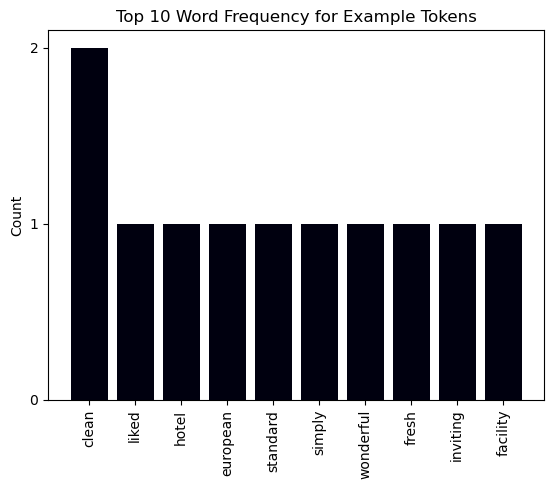

In [86]:
# Importing the relevant package for top number of words
from matplotlib.ticker import MaxNLocator

# Creating a function to visualize the top 10 words

def visualize_top_10(freq_dist, title, rotation):
#     extracting data for graph
    top_10 = list(zip(*freq_dist.most_common(10)))
    tokens = top_10[0]
    counts = top_10[1]
    
#     Setting up graph and plotting data
    fig, ax = plt.subplots()
    ax.bar(tokens, counts, color='#00000F')
#     ax.set_facecolor('#ffffff')

#     Customizing plot appearance 
    ax.set_title(title)
    ax.set_ylabel('Count')
    
    # Formatting the y-axis labels to show thousands 
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '{:,}'.format(int(x))))
    
    
    ax.tick_params(axis='x', rotation=rotation)
    
visualize_top_10(example_freq_dist, "Top 10 Word Frequency for Example Tokens", 90)

* **FreqDist on the Full DataSet**

In order to calculate the count of words, they need to be stored into a list. To do so, we will `explode` the dataset.  

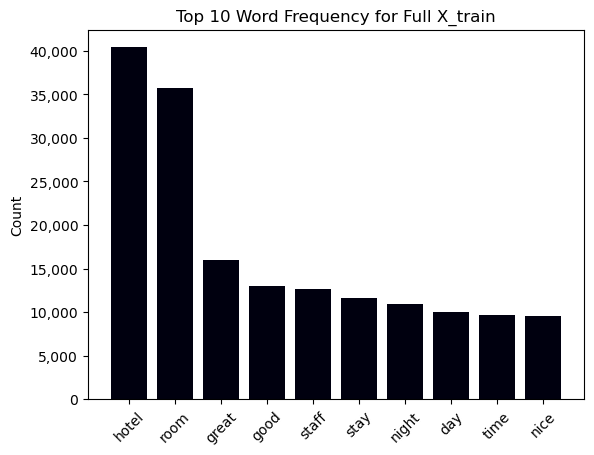

In [87]:
# Creating a frequency distribution for X_train
train_freq_dist = FreqDist(X_train['Review'].explode())

# Plotting the top 10 tokens
visualize_top_10(train_freq_dist, 'Top 10 Word Frequency for Full X_train', 45)


In [88]:
# Inspecting the most common 20 words
train_freq_dist.most_common(20)

[('hotel', 40415),
 ('room', 35676),
 ('great', 16025),
 ('good', 13032),
 ('staff', 12652),
 ('stay', 11663),
 ('night', 10967),
 ('day', 10037),
 ('time', 9667),
 ('nice', 9515),
 ('location', 8678),
 ('service', 8155),
 ('beach', 7830),
 ('restaurant', 7810),
 ('stayed', 7789),
 ('breakfast', 7546),
 ('food', 7260),
 ('clean', 7236),
 ('place', 7171),
 ('resort', 6814)]

We will also subdivide this by category (positive/not_positive) to see if it makes a difference:

In [89]:
# Adding in labels for filtering
X_train['label'] = [y_train[val] for val in X_train.index]

In [90]:
X_train

Review  \
11105  [truly, pleasant, experience, brought, family, honolulu, marathon, stayed, hyatt, week, dec, 16, training, organization, booked, hyatt, stayed, hotel, went, honolulu, chosen, particular, hotel, extremely, pleasant, experience, lobby, incredible, room, nothing, write, home, stayed, ewa, tower, told, recently, rennovated, run, tell, non, smoking, room, definitely, smoker, lot, honolulu, insanely, expensive, hotel, exception, abc, store, hotel, stock, certain, thing, tempted, break, mini, bar, charged, thing, removed, taken, twice, happened, guest, service, charge, promptly, removed, forget, check, room, charge, billing, definitely, valet, parking, 15, day, self, parking, care, headache, parking, nightmare, honolulu, course, end, tipping, car, ready, waiting, minute, call, hotel, rest, honolulu, ...]   
20111                            [concern, warranted, breeze, 25, year, old, returned, week, stay, breeze, resort, girlfriend, arrived, december, 30, returned, january, 14, 2005, read, review, breeze, arrived, resort, admit, fairly, worried, quality, hotel, try, answer, question, arriving, resort, hurrican, damage, repair, going, day, notice, service, fully, running, ground, beautiful, avoid, resort, hurricane, damage, check, arrived, hotel, 10, 00, approximately, 150, people, expect, hotel, check, time, took, hour, everybody, checked, hotel, longer, usual, check, time, average, north, american, hotel, largely, result, person, spending, minute, arguing, waterfront, room, waiting, hotel, staff, friendly, provided, drink, walk, nearby, bar, order, wanted, got, checked, given, room, number, told, room, ...]   
10569                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    [good, high, recommended, nice, location, closed, metro, min, walk, great, price, friendly, staff, freely, upgraded, room, know, little, problem, highly, recommended]   
2637                                                                                                         [ok, pro, beautiful, beach, plenty, sun, bed, umbrella, ask, waiter, nicely, sized, rooms3, staff, pleasant4, lobby, bar, stay, open, late, band, dj, latin, dancing5, great, spa, 140, 50, min, hot, stone, massage, con, expensive, hotel, idea, price, 10, smallish, mojito, pina, coladas, beer, breafast, buffet, 30, person, tuna, salad, wrap, tortilla, chip, pool, restaurant, 13, try, eat, dinner, hotel, restaurant, menu, pricey, 25, 35, entree, think, expensive, vacation, need, car, taxi, want, eat, mid, priced, meal, ate, restaurant, called, antojitos, moderately, priced, good, puerto, rican, food, end, road, rt, disappointed, alot, puerto, rican, food, served, hotel, day, ate, alot, american, ...]   
14179                                             [quiet, peaceful, getaway, hotel, resort, incredibly, scenic, room, large, comfortable, bed, slept, long, distance, away, lobby, quickly, taken, room, friendly, young, man, golf, cart, carried, heavy, bag, stair, ocean, view, room, large, lanai, woke, morning, sound, tropical, bird, desk, clerk, little, pleasant, halfway, stay, room, key, quit, working, sprawling, property, long, walk, lobby, problem, fixed, clerk, handed, key, apologized, acted, like, understood, inconvenience, good, resort, outstanding, little, attention, pool, area, gorgeous, open, dawn, dusk, according, hotel, information, jacuzzi, pool, area, well, lit, dark, close, nice, place, end, 

In [91]:
# Reminding custom colors
# Defining custom colors
custom_colors = ['#00000F', '#00AF87']

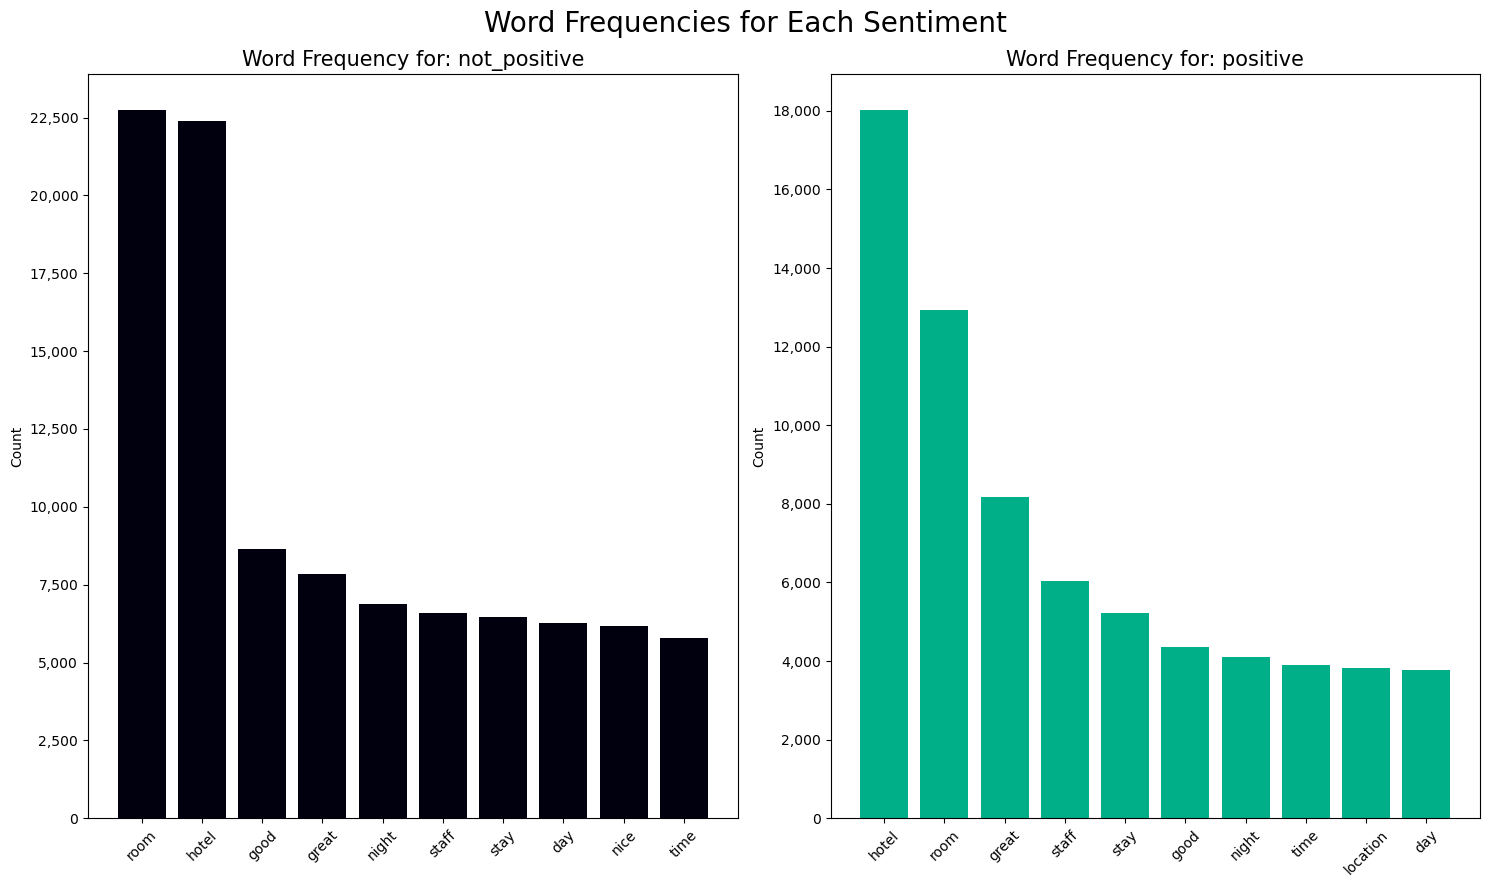

In [92]:
# Defining funcrion to plot 2 visualizations

# Creating two columns 
def two_subplits():
    fig = plt.figure(figsize=(15, 9))
    fig.set_tight_layout(True)
    gs = fig.add_gridspec(1, 2)
    
    ax1 = fig.add_subplot(gs[0, 0]) #row 0, col 0 
    ax2 = fig.add_subplot(gs[0, 1]) #row 0, col 1 
    return fig, [ax1, ax2]

# Plotting the graph
def plot_distribution_by_sentiment(X_version, column, axes, rotation):
    for index, category in enumerate(X_version['label'].unique()): 
        # Calculating frequency distribution for this subset
        all_words = X_version[X_version['label'] == category][column].explode()
        freq_dist = FreqDist(all_words)
        top_10 = list(zip(*freq_dist.most_common(10)))
        tokens = top_10[0]
        counts = top_10[1]
        
        
        # Setting up a plot
        ax = axes[index]
        ax.bar(tokens, counts, color=custom_colors[index])
        
        # Setting background color
        # ax.set_facecolor('#F5F2EE')
    
        # Customizing plot appearance
        title = "Word Frequency for:"
        ax.set_title(f"{title} {category}", fontsize=15)
        ax.set_ylabel("Count")
        
        # Formatting the y-axis labels to show thousands 
        ax.yaxis.set_major_locator(MaxNLocator(integer=True))
        ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '{:,}'.format(int(x))))
        ax.tick_params(axis='x', rotation=rotation)
 
         
fig, axes = two_subplits()
plot_distribution_by_sentiment(X_train, 'Review', axes, 45)
fig.suptitle('Word Frequencies for Each Sentiment', fontsize=20)

 # Saving the plot as a PNG with a transparent background
plt.savefig('images/word_freq.png', transparent=True)

plt.show()

This is helpful to review them as a graph. We will define the subsets in a preliminary step to be able to review the frequency distribution without the need of a graph.  

In [93]:
# Frequency distribution
# Defining subset prior. Here: positive, negative, no company tweets

negative_reviews = X_train[X_train['label'] == '_not_positive']
positive_reviews = X_train[X_train['label'] == 'positive']
# no_product_or_company = X_train[X_train['product_or_company'] == 'undefined']

def freq_distr(subset, most_common):
    exploded_subset = subset['Review'].explode()
    subset_freq = FreqDist(exploded_subset)
    return subset_freq.most_common(most_common)



In [94]:
# Getting frequency distribution for top 20 strings of no_product_or_company
freq_distr(positive_reviews, 20)

[('hotel', 18026),
 ('room', 12927),
 ('great', 8171),
 ('staff', 6049),
 ('stay', 5212),
 ('good', 4370),
 ('night', 4095),
 ('time', 3892),
 ('location', 3813),
 ('day', 3778),
 ('stayed', 3559),
 ('service', 3389),
 ('breakfast', 3342),
 ('nice', 3330),
 ('restaurant', 3244),
 ('place', 3005),
 ('clean', 2959),
 ('excellent', 2882),
 ('beach', 2706),
 ('friendly', 2623)]

Now reviewing the first 20 words for positive reviews help us confirm that the first top 5 words are as represented in the positive than the negative reviews. They are most common words to refer to a hotel stay. 
They should be removed. They were  

In [95]:
# # Applying this to our whole dataset
# X_train['Review'] = X_train['Review'].apply(lambda x: preprocess_review(x))

In [96]:
# Including these new words to a new list of stopwords 
new_stopwords = ['hotel', 'room', 'great', 'good', 'night', 'day', 'nice', 'stay', 'stayed']

In [97]:
# Calling the previously defined function to remove stopwords 
X_train['Review'] = X_train['Review'].apply(lambda x: remove_stopwords(x, new_stopwords))

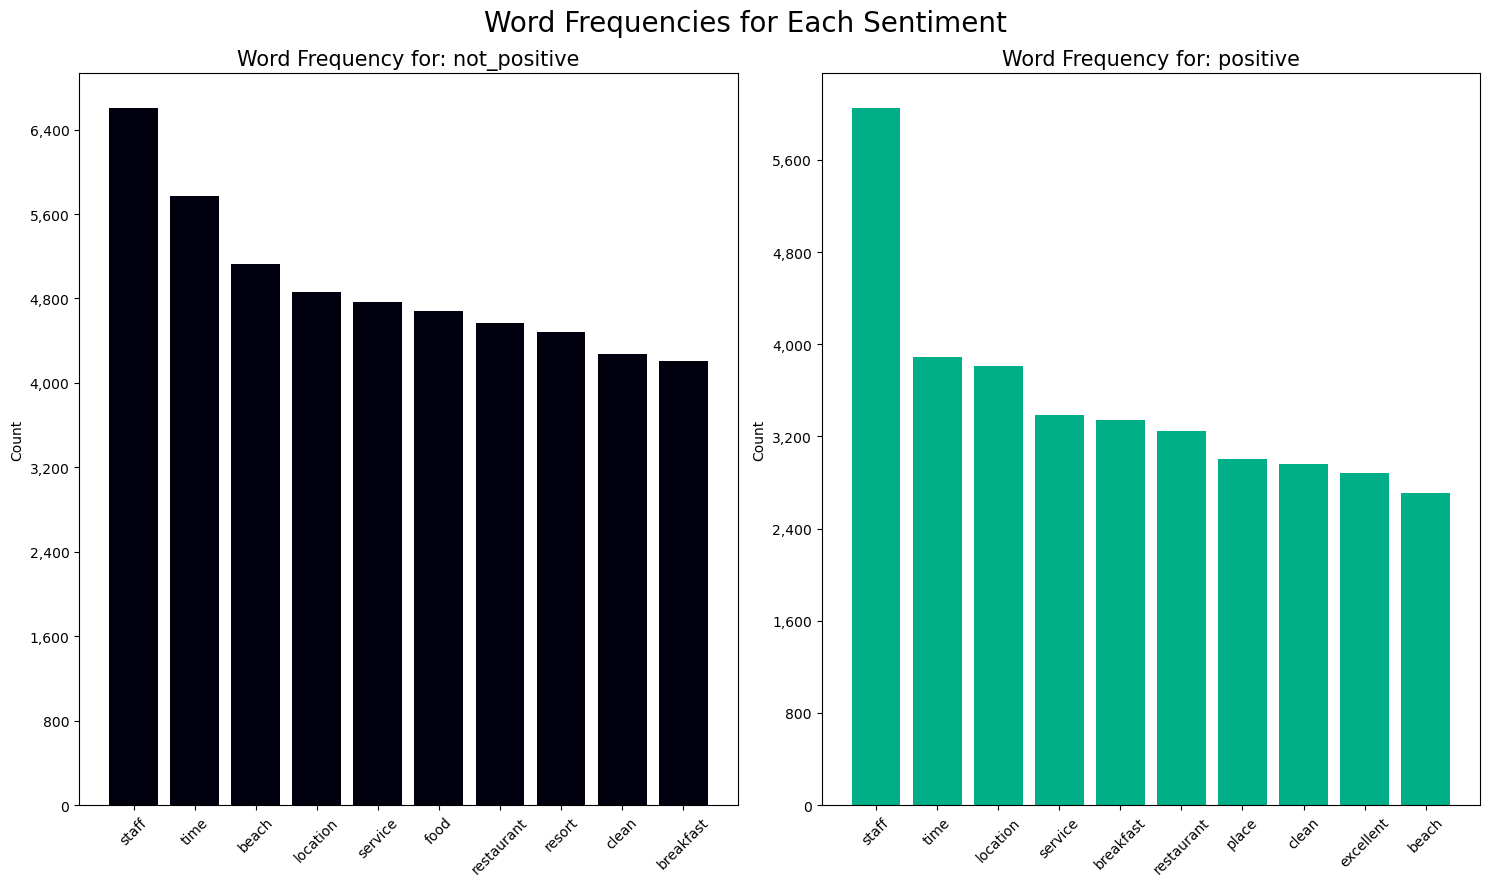

In [98]:
# Calling the function again to review the new split of top 10 words for each sentiment

fig, axes = two_subplits()
plot_distribution_by_sentiment(X_train, 'Review', axes, 45)
fig.suptitle('Word Frequencies for Each Sentiment', fontsize=20)

 # Saving the plot as a PNG with a transparent background
plt.savefig('images/word_freq.png', transparent=True)

plt.show()

We will filter on reviews that include specific words such as 'time' to review if they should be considered stopwords. 

In [99]:
# Defining the word to search 
word_search = 'time'

# Printing the results
X_train[X_train['Review_prep_nolist'].str.contains(word_search)][:3]

Review  \
20111  [concern, warranted, breeze, 25, year, old, returned, week, breeze, resort, girlfriend, arrived, december, 30, returned, january, 14, 2005, read, review, breeze, arrived, resort, admit, fairly, worried, quality, try, answer, question, arriving, resort, hurrican, damage, repair, going, notice, service, fully, running, ground, beautiful, avoid, resort, hurricane, damage, check, arrived, 10, 00, approximately, 150, people, expect, check, time, took, hour, everybody, checked, longer, usual, check, time, average, north, american, largely, result, person, spending, minute, arguing, waterfront, waiting, staff, friendly, provided, drink, walk, nearby, bar, order, wanted, got, checked, given, number, told, ready, 3pm, staff, assured, look, bag, return, returned, ready, luggage, order, ...]   
8127                                                                                                                                                                                                                                                                                                                                                                                [location, base, luxury, excellent, location, la, ramblas, plaixa, catalunya, comfortable, bit, odd, sink, outside, bathroom, want, sure, book, tend, spend, uch, time, pleasant, seating, area, lounge, downstairs, really, hang, bed, comfortable, clean, lift, bit, tedious, waiting, make, sure, working, leg, recommend, group, people, looking, bse, sleep, ready, really, hang, pricey, actually, step, euro, better, term, luxury]   
15123                                                                                                                                                [par, price, marco, polo, november, 18, 19, time, check, quick, efficient, got, light, working, called, reception, person, housekeeping, arrived, minute, later, light, bulb, quickly, realized, wrong, light, work, mentioned, need, engineer, went, reception, change, exactly, want, 16, hour, trip, europe, got, new, quickly, worked, fine, large, separate, pantry, old, fashioned, worn, fixture, furniture, tv, small, possible, bed, internet, speed, fine, hkd, 120, 24, hour, breakfast, arrived, morning, exactly, time, check, quick, efficient, conclusion, expected, middle, class, business, got, paid, fact, checked, nothing, worked, pull, evaluation]   

       Rating  \
20111       4   
8127        4   
15123       2   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [100]:
# Another way of searching directly in the column 'Review'
word_researched = 'quot'
filtered_on_word = X_train[X_train['Review'].apply(lambda review_list: any(word_researched in s for s in review_list))]
# filtered_on_word

In this case, time refers to check-in or check-out time. We should not remove it, and we will pay extra attention when going through bigrams. 

### 4: 2- g) WordCloud

We will now visually represent the most frequently mentioned words, without representing them in a bar graph. 
<br>Word clouds visually represent the frequency of words in a given text, with more frequently occurring words displayed in larger font size. This allows a quick and intuitive overview of the words occuring most.

In [101]:
# Installing wordcloud
# !pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host=files.pythonhosted.org wordcloud

In [102]:
# Importing relevant packages
from matplotlib.colors import LinearSegmentedColormap

# Defining a colormap that interpolates between the two defined colors
# custom_colors = ['#3F3533', '#F5F2EE']
# custom_colors were defined before 

n_bins = 5 

# Creating the custom colormap
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_colors, N=n_bins)

In [103]:
# Importing relevant packages 
from wordcloud import WordCloud

# Concatenate all Review into a single string
all_reviews = ' '.join(X_train['Review'].apply(lambda x: ' '.join(map(str, x))))

# Defining the function to plot wordclouds
def wordcloud_graph(text):
    
    # Generate a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='#ffffff', colormap=custom_cmap).generate(all_reviews)

    # Display the generated word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


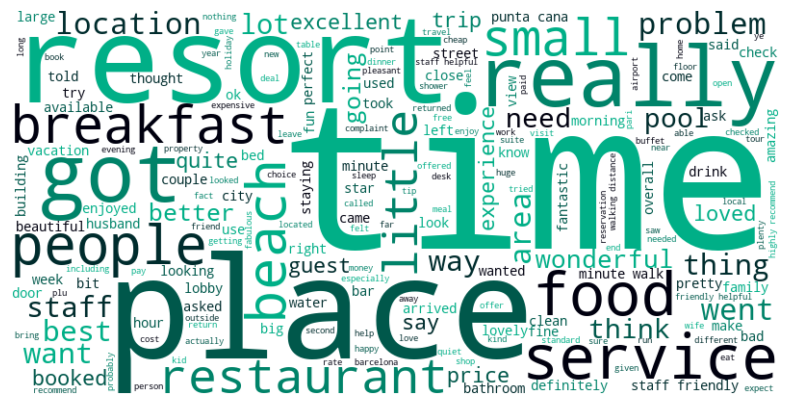

In [104]:
# Calling the function on all tweets
wordcloud_graph(all_reviews)

Whether it comes from the frequency distribution or word cloud, the product and companies are the words that come up the most. 64% of the data does not contain any company or product. We will try filtering on this one to understand if the top words are different.  

In [105]:
X_train.columns

Index(['Review', 'Rating', 'original_review', 'Review_prep_nolist', 'label'], dtype='object')

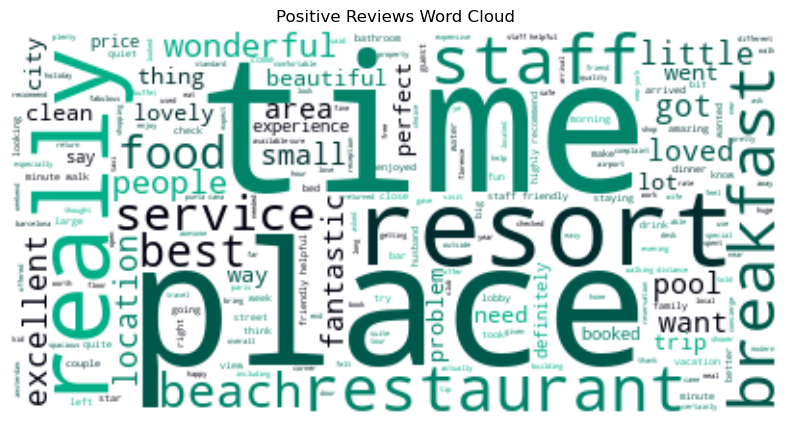

In [106]:
# Importing relevant packages
# import matplotlib.pyplot as plt
# from matplotlib.colors import LinearSegmentedColormap
# from wordcloud import WordCloud

# # Defining a colormap that interpolates between the two defined colors
# custom_colors = ['#3F3533', '#F5F2EE']
# n_bins = 5

# # Creating the custom colormap
# custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_colors, N=n_bins)

# Concatenate positive and not_positive reviews separately
positive_reviews = ' '.join(X_train[X_train['label'] == 'positive']['Review'].apply(lambda x: ' '.join(map(str, x))))
not_positive_reviews = ' '.join(X_train[X_train['label'] == 'not_positive']['Review'].apply(lambda x: ' '.join(map(str, x))))

# Defining the function to plot word clouds
def wordcloud_graph(text, title):
    # Generate a word cloud
    wordcloud = WordCloud(width=400, height=200, background_color='#ffffff', colormap=custom_cmap).generate(text)

    # Display the generated word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Plotting positive reviews word cloud
wordcloud_graph(positive_reviews, 'Positive Reviews Word Cloud')



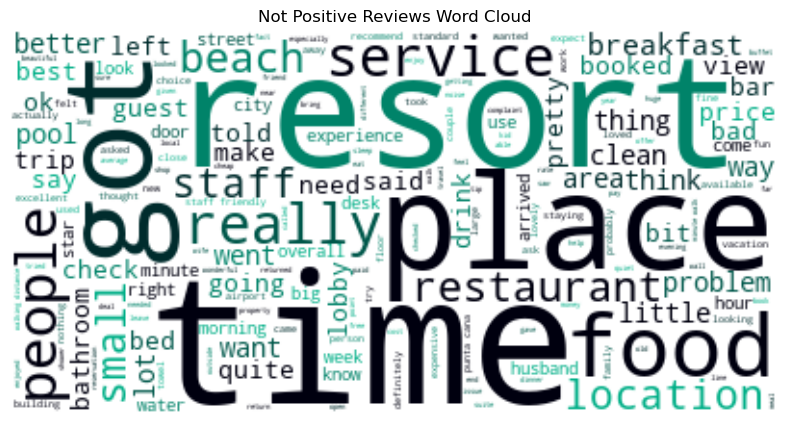

In [107]:
# Plotting not_positive reviews word cloud
wordcloud_graph(not_positive_reviews, 'Not Positive Reviews Word Cloud')

* **No company**

Let's inspect the dataframe filtered only on the ones where no product or company was included to review if there are any distinctions in the most frequent words. 

In [108]:
# # Creating a DataFrame for undefined product or company
# no_company = X_train[X_train['product_or_company'] == 'undefined']

In [109]:
# # Concatenating all tweets into a single string
# no_company_tweets = ' '.join(no_company['tweet'].apply(lambda x: ' '.join(map(str, x))))

# # Drawing the wordcloud on the list including only 'undefined' companies or products
# wordcloud_graph(no_company_tweets)

In [110]:
# # Plotting the frequency for each sentiment - only of 'undefined' products or companies 
# fig, axes = two_subplits()
# plot_distribution_by_sentiment(no_company, 'tweet', axes)
# fig.suptitle('Word Frequencies for Each Sentiment', fontsize=20)
# plt.show()

* **Company only**

For curiosity, let's inspect the dataframe filtered only on the ones where a product or company was included. 

In [111]:
# # Creating a DataFrame for only product or company
# company_only = X_train[X_train['product_or_company'] != 'undefined']

In [112]:
# # Inspecting company_only DataFrame
# company_only.head()

In [113]:
# # Concatenating all tweets into a single string
# company_tweets = ' '.join(no_company['tweet'].apply(lambda x: ' '.join(map(str, x))))

# wordcloud_graph(company_tweets)

In [114]:
# # Calling the function to plot frequency by sentiment
# fig, axes = two_subplits()
# plot_distribution_by_sentiment(company_only, 'tweet', axes)
# fig.suptitle('Word Frequencies for Each Sentiment', fontsize=20)
# plt.show()

* **No company words**

Filtering on the 'undefined' product or company still included a lot of company tokens. We will try to remove them manually. 

In [115]:
# # Defining list of product or company name to remove
# list_of_company_products = ['google', 'android', 'apple', 'ipad', 'iphone', 'ipad2']
# # Making a copy of the dataframe to first evaluate
# no_product_company = X_train.copy()

In [116]:
# # Removing any word corresponding to product or company
# no_product_company['tweet'] = no_product_company['tweet'].apply(
#     lambda tweet_list: [word for word in tweet_list if word.lower() not in list_of_company_products]
# )

In [117]:
# # Verifying if words were removed at first glance
# no_product_company.head()

In [118]:
# # Researching the tweets which refer to ipad
# word_researched = 'ipad'
# filtered_on_word = no_product_company[no_product_company['tweet'].apply(lambda tweet_list: any(word_researched in s for s in tweet_list))]

In [119]:
# # Calling new dataframe filtered on word
# filtered_on_word.head()

In [120]:
# # Concatenating all tweets into a single string
# no_prod_comp_list = ' '.join(no_product_company['tweet'].apply(lambda x: ' '.join(map(str, x))))

In [121]:
# # Viewing the frequencies for each sentiment
# fig, axes = two_subplits()
# plot_distribution_by_sentiment(no_product_company, 'tweet', axes)
# fig.suptitle('Word Frequencies for Each Sentiment', fontsize=20)
#  # Saving the plot as a PNG with a transparent background
# plt.savefig('images/freq_by_sentiment.png', transparent=True)
# plt.show()

In [122]:
# # Getting frequency for no_prod_company_tweets
# # no_product_company 
# positive_tweets_no_comp = no_product_company[no_product_company['label'] == 'positive']
# negative_tweets_no_comp = no_product_company[no_product_company['label'] == 'negative']

In [123]:
# # Viewing the frequency of words without a plot: no product or company
# freq_distr(no_product_company, 20)

In [124]:
# # Viewing the frequency of words without a plot: positive tweets only for no company or product
# freq_distr(positive_tweets_no_comp, 20)

In [125]:
# # Viewing the frequency of words without a plot: negative tweets only for no company or product
# freq_distr(negative_tweets_no_comp, 20)

Having filtered on no company tweets give us a better idea.

Positive tweets talk about...
<br>negative tweets talk about ... 

Let's review bigrams to get a better understanding. 

### 4: 2- h) Bigrams

#### Bigrams

* **All Reviews**

In [126]:
# Importing relevant package
from nltk.collocations import *

# Storing nltk.collocations.BigramAssocMeasures into variable
bigram_measures = nltk.collocations.BigramAssocMeasures()

In [127]:
# Defining a function to review bigrams
def bigram_review(text, top_n):
    # Creating a finder and passing it the words of tweets summarized as 1 list  
    text_finder = BigramCollocationFinder.from_words(text.sum())
    text_scored = text_finder.score_ngrams(bigram_measures.raw_freq)
    return text_scored[: top_n]


In [128]:
# Calling the function to review the top 20 bigrams 
bigram_review(X_train['Review'], 20)

[(('staff', 'friendly'), 0.0012371434823838354),
 (('punta', 'cana'), 0.0009409876723320446),
 (('minute', 'walk'), 0.0009074330731636152),
 (('friendly', 'helpful'), 0.0007929097673061492),
 (('walking', 'distance'), 0.0007929097673061492),
 (('staff', 'helpful'), 0.0006528557881683566),
 (('highly', 'recommend'), 0.0005857465898314976),
 (('make', 'sure'), 0.0004821650010941717),
 (('san', 'juan'), 0.00048070610547815303),
 (('10', 'minute'), 0.0004704938361660223),
 (('new', 'york'), 0.0004033846378291633),
 (('breakfast', 'buffet'), 0.0003953607119410606),
 (('air', 'conditioning'), 0.0003909840250930046),
 (('value', 'money'), 0.0003771245167408272),
 (('bed', 'comfortable'), 0.0003596177693486031),
 (('train', 'station'), 0.00035597053030855645),
 (('pool', 'area'), 0.00035378218688452844),
 (('15', 'minute'), 0.00035086439565249107),
 (('year', 'old'), 0.00035086439565249107),
 (('friendly', 'staff'), 0.0003450288131884164)]

We saw earlier that the tweets containing company names or products indicated too many of of these strings, and were not relevant for us. We will straight away separate positive and negative tweets from the dataset that contains no product or company information. 

In [132]:
# Creating subsets by positives or not positive reviews
X_train_positives = X_train[X_train['label'] == 'positive']
X_train_notpositives = X_train[X_train['label'] != 'positive']

In [144]:
# Calling the bigram function on positives
positive_bigrams_100 = bigram_review(X_train_positives['Review'], 100)

In [152]:
# Calling the bigram function on negatives
notpositive_bigrams_100 = bigram_review(X_train_notpositives['Review'], 100)

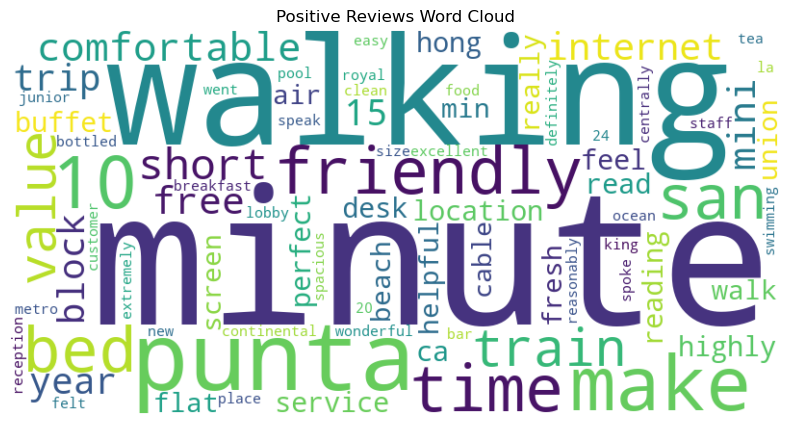

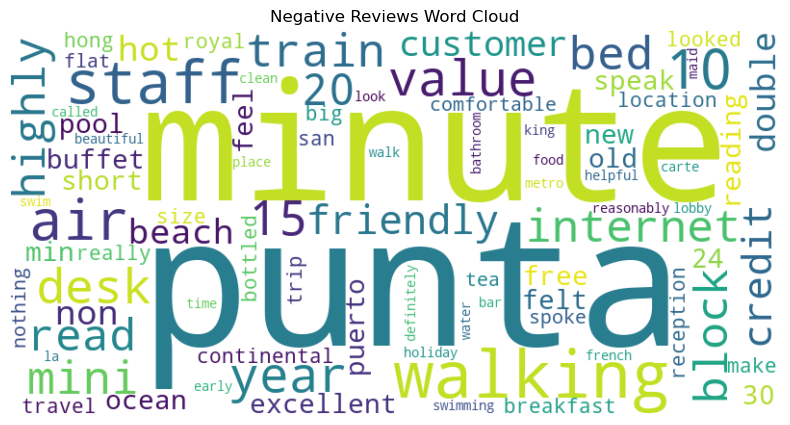

In [136]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract bigrams and their frequencies
positive_bigrams = bigram_review(X_train_positives['Review'], 100)
negative_bigrams = bigram_review(X_train_notpositives['Review'], 100)

# Convert bigrams to a dictionary for WordCloud
positive_wordcloud_data = {bigram[0]: freq for bigram, freq in positive_bigrams}
negative_wordcloud_data = {bigram[0]: freq for bigram, freq in negative_bigrams}

# Create WordClouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(positive_wordcloud_data)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(negative_wordcloud_data)

# Plotting positive word cloud
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud')
plt.axis('off')
plt.show()

# Plotting negative word cloud
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud')
plt.axis('off')
plt.show()


In [146]:
positive_bigrams_100

[(('staff', 'friendly'), 0.001415719801030014),
 (('minute', 'walk'), 0.0010732364856450042),
 (('friendly', 'helpful'), 0.0010622477161674102),
 (('highly', 'recommend'), 0.0010219555614162327),
 (('walking', 'distance'), 0.0009853263298242529),
 (('punta', 'cana'), 0.0008461352497747302),
 (('staff', 'helpful'), 0.0008131689413419486),
 (('new', 'york'), 0.0006703149381332279),
 (('make', 'sure'), 0.0005054833959693193),
 (('10', 'minute'), 0.0004596968564793448),
 (('friendly', 'staff'), 0.0004432137022629539),
 (('time', 'square'), 0.00043771931752415697),
 (('san', 'francisco'), 0.000435887855944558),
 (('breakfast', 'buffet'), 0.0004194047017281671),
 (('bed', 'comfortable'), 0.0004120788554097712),
 (('clean', 'comfortable'), 0.0004065844706709743),
 (('san', 'juan'), 0.0003992586243525783),
 (('train', 'station'), 0.0003955957011933804),
 (('value', 'money'), 0.0003955957011933804),
 (('short', 'walk'), 0.0003901013164545834),
 (('comfortable', 'bed'), 0.0003864383932953854),
 

In [148]:
# Combining bigram words into a single string for each bigram
positive_bigram_strings = [' '.join(bigram[0]) for bigram in positive_bigrams_100]
positive_bigram_strings

['staff friendly',
 'minute walk',
 'friendly helpful',
 'highly recommend',
 'walking distance',
 'punta cana',
 'staff helpful',
 'new york',
 'make sure',
 '10 minute',
 'friendly staff',
 'time square',
 'san francisco',
 'breakfast buffet',
 'bed comfortable',
 'clean comfortable',
 'san juan',
 'train station',
 'value money',
 'short walk',
 'comfortable bed',
 'staff extremely',
 'excellent location',
 'free internet',
 'mini bar',
 'definitely recommend',
 'internet access',
 'pool area',
 'location perfect',
 'trip advisor',
 'year old',
 'block away',
 '15 minute',
 'helpful friendly',
 'highly recommended',
 'desk staff',
 'location excellent',
 'feel like',
 'service excellent',
 'hong kong',
 'extremely helpful',
 'reading review',
 'buffet breakfast',
 'ca wait',
 'perfect location',
 'pool beach',
 'read review',
 'flat screen',
 'min walk',
 'breakfast included',
 'helpful staff',
 'new orleans',
 'walk away',
 'really enjoyed',
 'screen tv',
 'air conditioning',
 'bea

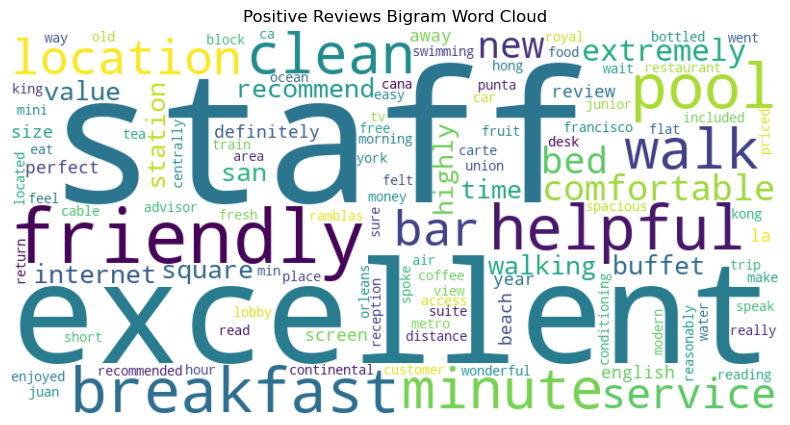

In [150]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming positive_bigrams is a list of tuples where each tuple contains a bigram and its frequency
# positive_bigrams = [
#     (('staff', 'friendly'), 0.001415719801030014),
#     # ... other bigrams
# ]

# Combine bigram words into a single string for each bigram
positive_bigram_strings = [' '.join(bigram[0]) for bigram in positive_bigrams_100]

# Create a WordCloud using the combined bigram strings
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_bigram_strings))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Reviews Bigram Word Cloud')
plt.axis('off')
plt.show()


In [151]:
# Combining bigram words into a single string for negative bigram
notpositive_bigram_strings = [' '.join(bigram[0]) for bigram in notpositive_bigrams_100]
notpositive_bigram_strings

['staff friendly',
 'punta cana',
 'minute walk',
 'walking distance',
 'friendly helpful',
 'staff helpful',
 'san juan',
 'air conditioning',
 '10 minute',
 'make sure',
 'breakfast buffet',
 '15 minute',
 'value money',
 'pool area',
 'year old',
 'desk staff',
 'train station',
 'bed comfortable',
 'mini bar',
 'beach pool',
 'pool beach',
 'internet access',
 'block away',
 'highly recommend',
 'read review',
 '20 minute',
 'friendly staff',
 'la carte',
 'credit card',
 'customer service',
 'hot water',
 'beach beautiful',
 'clean comfortable',
 'non smoking',
 'double bed',
 'excellent location',
 'min walk',
 'buffet breakfast',
 'reading review',
 'short walk',
 '24 hour',
 'speak english',
 'free internet',
 'pool bar',
 '30 minute',
 'new york',
 'felt like',
 'feel like',
 'ocean view',
 'old san',
 'new orleans',
 'puerto rico',
 'continental breakfast',
 'really enjoyed',
 'breakfast included',
 'size bed',
 'travel agent',
 'clean staff',
 'reception staff',
 'san franci

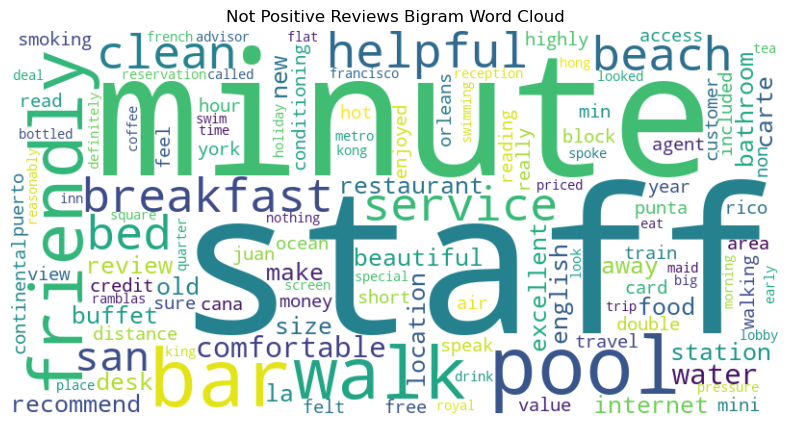

In [153]:
# Assuming positive_bigrams is a list of tuples where each tuple contains a bigram and its frequency
# positive_bigrams = [
#     (('staff', 'friendly'), 0.001415719801030014),
#     # ... other bigrams
# ]

# Combining bigram words into a single string for each bigram
notpositive_bigram_strings = [' '.join(bigram[0]) for bigram in notpositive_bigrams_100]

# Create a WordCloud using the combined bigram strings
notpositive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(notpositive_bigram_strings))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(notpositive_wordcloud, interpolation='bilinear')
plt.title('Not Positive Reviews Bigram Word Cloud')
plt.axis('off')
plt.show()


In [155]:
# Plotting the graph for positive bigrams
def plot_distribution_positive_bigrams(X_version, column, axes, rotation):
    category = 'positive'  # You can adjust this label as needed
    
    # Calculating frequency distribution for positive bigrams
    all_bigrams = bigram_review(X_version[X_version['label'] == category]['Review'], 10)
    
    # Unpack the bigrams and counts
    tokens, counts = zip(*all_bigrams)
    
    # Setting up a plot
    ax = axes[0]
    ax.bar(tokens, counts, color=custom_colors[0])
    
    # Customizing plot appearance
    title = "Bigram Frequency for:"
    ax.set_title(f"{title} {category}", fontsize=15)
    ax.set_ylabel("Count")
    
    # Formatting the y-axis labels to show thousands 
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '{:,}'.format(int(x))))
    ax.tick_params(axis='x', rotation=rotation)


In [ ]:
plot_distribution_positive_bigrams(X_train, '')

In [129]:
stopped here

SyntaxError: invalid syntax (3346485601.py, line 1)

In [ ]:
positive_bigrams = bigram_review

In [ ]:
# They were declared before
# positive_tweets_no_comp = no_product_company[no_product_company['label'] == 'positive']
# negative_tweets_no_comp = no_product_company[no_product_company['label'] == 'negative']

* **Positive Reviews**

In [ ]:
# Calling the function to review the top 20 bigrams for positive tweets only
bigram_review(positive_tweets_no_comp['tweet'], 20)

1. There is enthusiasm around the new pop up store created. 
<br>In addition, the fact these are temporary locations create even more envy to be there first. 
<br>This indicates that: for the launch of the folding tablet, exclusive access to SXSW attendees should be organized to create craze around the new product.  

2. The new social network "Circle" created created a lot of curiosity as well. 
<br>We would not recommend creating a social network nowadays as the market is already mature in this area, but this can be used to know to create a specific hashtag associated with a game to win the new folding tablet. 

3. The speech Marissa Mayer gave was very well received. <br>Organizing a speech for this year by a respected leader in the technology market would be recommended as well.   

* **Negative Reviews**

In [ ]:
# Calling the function to review the top 20 bigrams for negative tweets only
bigram_review(negative_tweets_no_comp['tweet'], 20)

### 4: 2- i) Mutual Information Scores

We will calculate mutual information scores and we will create a frequency filter, so that we only examine bigrams that occur more than a set number of times: here, 5. 

In [ ]:
# Defining a function to calculate the mutual information scores
def mutual_info_score(text, n_filter):
    text_pmi_finder = BigramCollocationFinder.from_words(text.sum())
    text_pmi_finder.apply_freq_filter(n_filter)
    text_pmi_scored = text_pmi_finder.score_ngrams(bigram_measures.pmi)
    return text_pmi_scored

In [ ]:
# Calling the function for the top 10 mutual information scores for all tweets
mutual_info_score(no_product_company['tweet'], 5)[:10]

In [ ]:
# Calling the function for the top 10 mutual information scores for positive tweets
mutual_info_score(positive_tweets_no_comp['tweet'], 5)[:10]

In [ ]:
# Calling the function for the top 10 mutual information scores for negative tweets
mutual_info_score(negative_tweets_no_comp['tweet'], 5)[:10]

The mutual information scores inform us that several speakers were present, and that concerts are often talked about at SXSW.
* Barton Hollow did a live at the conference
* JC Penney CEO and made a speech at the conference
* Co-Founder and TED prize winner Cameron Sinclair was present as well 


On the positive side: music events create buzz. 
* League of Extraordinary G'z were really well received
* Security at the events is appreciated 
* The launch of galaxy ii was already talked about often, and with positive sentiments associated 


<a id='modeling'></a>

## 5. Modeling

We now have an initial idea for recommendations for the marketing strategy. Our objective is now to:
1. Provide more precise recommendations
2. Develop a tool to measure the tweets' sentiments, once the strategy is deployed

Because it is important to measure both sentiments: whether they are positive, or negative, the evaluation metrics we will focus on will be accuracy and F1. 
<br>In addition, the dataset is highly imbalanced: 67% of tweets are not positive. This is natural to have more reviews around negative than positives and we expect new unseen data to have similar distributions.  
<br>Accuracy score by itself might be misleading, while F1 considers both false positives and false negatives. 

As the dataset is a text, it requires a transformation before it can be used for modeling. Like other types of dataset would one-hot encoded, here, the tweets were vectorized, using the common method in natural language processing: `TfidfVectorizer`.  
<br> It converts a collection of text documents to a matrix of tf-idf features. 

* Term-Frequency
<br>Measures how often a term (word) appears in a document
* Inverse Document Frequency (IDF)
<br>Measures the importance of a term in the entire collection of documents. 

4 main classification models were explored: 
1. Multinomial Naive Bayes
2. Decision Tree
3. Random Forest 
4. K-Nearest Neighbor 

The models' parameters were tuned using the following approaches:
1. Under Sampling
2. Hyperparameter Tuning
    * Combinatoric Grid Searching



In [ ]:
# Reminding the natural balance
y_train.value_counts(normalize=True)

By using only the dataset's natural class balance, and if we guessed the contribution of the majority class every time we would get 67% accuracy. However, if we were to guess that a tweet was positive, we would expect only about 33% accuracy. 

### 5. a) Baseline Model with TfidfVectorizer and MultinomialNB

The first baseline model will vectorize the tweets and make predictions using Multinomial Naive Bayes. The first step is to import the vectorizer, instantiate a vectorizer object and fit it on `X_train['tweet']`.

### <u>1st iteration</u>: Tfidf Vectorizer with Pipeline 

    1) Fitting and training on train data

In [ ]:
# Importing the relevant packages
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Define the pipeline steps
tfidf_vectorizer = TfidfVectorizer(max_features=10)
naive_bayes_classifier = MultinomialNB()

# Create the pipeline
base_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('classifier', naive_bayes_classifier)
])

# Fitting the pipeline on X_train['tweet_original'] and y_train
base_pipeline.fit(X_train['tweet_original'], y_train)

# Calculating predictions using this model
base_y_pred = base_pipeline.predict(X_test['tweet_original'])

# Optionally, you can access the individual components of the pipeline:
X_train_vectorized = base_pipeline.named_steps['tfidf'].transform(X_train['tweet_original'])
baseline_model = base_pipeline.named_steps['classifier']

    2) Evaluation Metrics

In [ ]:
# Importing the relevant packages
from sklearn.metrics import precision_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score

def evaluation_metrics(y_test, y_pred, model, X, y):
    with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
    
    # Calculating and printing accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.4f}')

    # Calculating and printing F1-score
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f'F1-Score: {f1:.4f}')
    
    # Calculating and printing precision
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    print(f'Precision: {precision:.4f}')

    # Performing cross-validation and printing the mean accuracy
    cv_scores = cross_val_score(model, X, y, cv=5)
    mean_cv_accuracy = cv_scores.mean()
    print(f'Mean Cross-Validated Accuracy: {mean_cv_accuracy:.4f}')
    
    return accuracy, f1, precision, mean_cv_accuracy

In [ ]:
# Naming the model and calling the function to evaluate it
baseline_model_name = 'Baseline'

# Calling the function and recording into the defined values
accuracy_base, precision_base, f1_base, cv_base = evaluation_metrics(
    y_test, 
    base_y_pred, 
    base_pipeline, 
    X_train['tweet_original'], 
    y_train)

    3) Classification Report

In [ ]:
# Defining a function to print a classification report

import warnings
from sklearn.metrics import classification_report

def class_calculation(y_test, y_pred):
    # y_preds will be calculated for each model beforehand 
    
    # Generating and printing classification report
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=RuntimeWarning)
    class_report = classification_report(y_test, y_pred, zero_division=0, digits=5)
    
    # Due to class imbalance, the initial precision for positive returns 0 
    # Consequently, warnings need to be handled 
    print('Classification Report:\n', class_report)
    return class_report
    
    


In [ ]:
# Calling the function to record the classification report
base_class_report = class_calculation(y_test, base_y_pred)

    4) Confusion Matrix

In [ ]:
# Importing relevant packages
from matplotlib.colors import LinearSegmentedColormap

# Defining a colormap that interpolates between the two defined colors
custom_colors_cnf = ['#3F3533', '#F5F2EE']

n_bins = 20 

# Creating the custom colormap
custom_cmap_cnf = LinearSegmentedColormap.from_list("custom_cmap", custom_colors_cnf, N=n_bins)

In [ ]:
# Displaying visually the confusion matrix 

# Importing the relevant package 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

def confusion_matrix_display(model, y_test, y_pred):
    # Defining the confusion matrix 
    cnf_matrix = confusion_matrix(y_test, y_pred)
#     print(cnf_matrix)
    
    # Normalizing the confusion matrix
    cnf_matrix_normalized = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

    disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_normalized, display_labels=model.classes_)

    disp.plot(cmap=custom_cmap_cnf)

    plt.title("Model Performance: Confusion Matrix", fontsize=16)

    # Saving the plot as a PNG with a transparent background
    plt.savefig('images/confusion_matrix.png', transparent=True)

    return cnf_matrix
    plt.show()
    

In [ ]:
# Calling the function to display the confusion matrix 
base_cfn_matrix = confusion_matrix_display(base_pipeline, y_test, base_y_pred)

### <u>2nd iteration</u>: Addressing class imbalance: undersampling negative tweets

The model does not have enough data for positive tweets, comparatively to negative ones. 

As a consequence, the dataset needs to be resampled. More precisely, negative tweets need to be undersampled.

    1) Fitting and training on train data

In [ ]:
# Importing relevant packages
from imblearn.under_sampling import RandomUnderSampler
import imblearn.pipeline

Now that we have preprocessed data, we will fit and evaluate the baseline model on the newly resampled data.

In [ ]:
# Defining the pipeline steps
tfidf_vectorizer = TfidfVectorizer(max_features=10)
naive_bayes_classifier = MultinomialNB()

# Including the UnderSampler to the pipeline
rs_pipeline = imblearn.pipeline.Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('us', RandomUnderSampler(random_state=42)),
    ('classifier', naive_bayes_classifier)
])

# Fitting the pipeline on X_train['tweet_original'] and y_train
rs_pipeline.fit(X_train['tweet_original'], y_train)

rs_y_pred = rs_pipeline.predict(X_test['tweet_original']) 


In [ ]:
# Verifying the value counts of each category, before undersampling
original_value_counts = y_train.value_counts()
print("Original class distribution:")
print(original_value_counts)

# Getting the indices of the resampled data
resampled_indices = rs_pipeline.named_steps['us'].sample_indices_

# Verifying the new value counts of each category, after undersampling
resampled_value_counts = y_train.iloc[resampled_indices].value_counts()
print("\nClass distribution after undersampling:")
print(resampled_value_counts)


    2) Evaluation Metrics

In [ ]:
# Naming the model
resampled_model_name = 'Resampled'

# Calling the function and recording into the defined values
accuracy_rs, f1_rs, precision_rs, cv_rs = evaluation_metrics(
    y_test, 
    rs_y_pred, 
    rs_pipeline, 
    X_train['tweet_original'], 
    y_train)

The accuracy score drastically decreased, but we now have a precision and f1 scores, indicating the 'positive sentiments' are now correctly represented.  

    3) Classification Report

In [ ]:
resamp_class_report = class_calculation(y_test, rs_y_pred)

    4) Confusion Matrix

In [ ]:
rs_cfn_matrix = confusion_matrix_display(rs_pipeline, y_test, rs_y_pred)

### <u>3rd iteration</u>: including stopwords

We will now test fitting the vectorizer by removing the stopwords from tweets to review if this can help predictions be more accurate.

    1) Fitting and training train data

In [ ]:
# Defining the pipeline steps, including the stopwords_list created 
tfidf_vectorizer = TfidfVectorizer(max_features=10, stop_words=stopwords_list)
naive_bayes_classifier = MultinomialNB()

# Instantiating the pipeline with the undersampler and the new vectorizer
pipeline_nostop = imblearn.pipeline.Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('us', RandomUnderSampler(random_state=42)),
    ('classifier', naive_bayes_classifier)
])

# Fit the pipeline on X_train['tweet_original'] and y_train
pipeline_nostop.fit(X_train['tweet_original'], y_train)

# Generating predictions
nostop_y_pred = pipeline_nostop.predict(X_test['tweet_original'])

    2) Evaluation Metrics

In [ ]:
# Naming the model
nostop_model_name = 'No Stopwords'

# Calling the function and recording into the defined values
accuracy_nostop, f1_nostop, precision_nostop, cv_nostop = evaluation_metrics(
    y_test, 
    nostop_y_pred, 
    pipeline_nostop, 
    X_train['tweet_original'], 
    y_train)

The accuracy score now increased slightly, however it remains below just guessing the majority class.

    3) Classification Report

In [ ]:
# Calling the classification function
nostop_class_report = class_calculation(y_test, nostop_y_pred)

    4) Confusion Matrix

In [ ]:
# Calling the confusion matrix function
nostop_cfn_matrix = confusion_matrix_display(pipeline_nostop, y_test, nostop_y_pred)

### <u>4th iteration</u>: Applying the full preprocessing to tweets

    1) Fitting and training train data

In [ ]:
# Not applying stopwords to the vectorizer, as they were applied to the preprocessed tweets.

In [ ]:
# Defining the pipeline steps 
tfidf_vectorizer = TfidfVectorizer(max_features=10)
naive_bayes_classifier = MultinomialNB()

# Instantiating the pipeline with the undersampler and the new vectorizer
pipeline_prep = imblearn.pipeline.Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('us', RandomUnderSampler(random_state=42)),
    ('classifier', naive_bayes_classifier)
])

# Fitting the pipeline on X_train['tokenized tweet'] which contains the preprocessed tweets
pipeline_prep.fit(X_train['tokenized_tweet'], y_train)

# Generating predictions
prep_y_pred = pipeline_prep.predict(X_test['tokenized_tweet'])

    2) Evaluation Metrics

In [ ]:
preprocessed_model_name = 'Preprocessed'

# Calling the function and recording into the defined values
accuracy_pp, f1_pp, precision_pp, cv_pp = evaluation_metrics(
    y_test, 
    prep_y_pred, 
    pipeline_prep, 
    X_train['tokenized_tweet'], 
    y_train)

All scores decreased, when applying the model on the full tokenized tweets

    3) Classification Report

In [ ]:
# Drawing the classification report 
prep_class_report = class_calculation(y_test, prep_y_pred)

    4) Confusion Matrix

In [ ]:
# Plotting the confusion matrix
prep_cnf_matrix = confusion_matrix_display(pipeline_prep, y_test, prep_y_pred)

### <u>5th iteration</u>: Tuning Tfidf Vectorizer - Hyperparameter tuning

The model performed better when stopwords were removed but worse when applied on the full tokenized tweets. Let's try to use combinatoric grid searching to find the best parameters for the vectorizer. 

    1) Fitting and training train data

In [ ]:
from sklearn.model_selection import GridSearchCV

# Defining the pipeline steps, excluding any manual input of features, with the vectorizer and classifier
# The pipeline still includes the undersampler to ensure class imbalance
gs_pipeline = imblearn.pipeline.Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('us', RandomUnderSampler(random_state=42)),
    ('classifier', MultinomialNB())
])

# Define the parameter grid to search over
parameters = {
    'tfidf__max_features': [10, 50, 100, None],
    'tfidf__max_df': [0.7, 0.8, 0.9],
    'tfidf__min_df': [1, 2, 3],
    'tfidf__sublinear_tf': [True, False],
    'tfidf__ngram_range': [(1, 1), (1, 2), (2, 2)],
    # including the list of stopwords that was defined earlier 
    'tfidf__stop_words': [None, 'english', stopwords_list],
}


In [ ]:
# Performing grid search for hyperparameter tuning
grid_search = GridSearchCV(gs_pipeline, parameters, cv=5, scoring='accuracy', error_score='raise')

# Fitting the tuned pipeline on training data
grid_search.fit(X_train['tweet_original'], y_train)


In [ ]:
# Recording the best parameters and printing them
best_tfidf_params = grid_search.best_params_

# Recording the best estimator as the best_pipeline
best_pipeline = grid_search.best_estimator_

print("Best Parameters:", best_tfidf_params)


In [ ]:
# Fitting the best pipeline on training data
best_pipeline.fit(X_train['tweet_original'], y_train)

# Fitting the best model on the full training data
best_gs_y_pred = best_pipeline.predict(X_test['tweet_original'])

    2) Evaluation Metrics

In [ ]:
# Naming the model
tuned_model_name = 'NaiveBayes'

# Calling the function and recording into the defined values
accuracy_gs, f1_gs, precision_gs, cv_gs = evaluation_metrics(
    y_test, 
    best_gs_y_pred, 
    best_pipeline, 
    X_train['tweet_original'], 
    y_train)

The classification metrics are starting to increase and are starting to show more stability, less disparity among one another.

    3) Classification Report

In [ ]:
# Calling the classification report function
tuned_class_report = class_calculation(y_test, best_gs_y_pred)

    4) Confusion Matrix

In [ ]:
# Plotting the confusion matrix
gs_cfn_matrix = confusion_matrix_display(best_pipeline, y_test, best_gs_y_pred)

### 5. b) TfidfVectorizer and Decision Trees

### <u>6th iteration</u>: Decision Trees and Tfidf Vectorizer

Decision trees work well for understanding language because they are easy to interpret and handle the nuances in how words relate. They are good at understanding what words matter most and can deal with different types of word data without much difficulty. 

    1) Fitting and training train data

For higher computing performance, the best parameters recorded on the vectorizer with Multinomial Naive Bayes will be kept. Only the classifier will be modified. Let's see if, by using the best TF-IDF parameters with another classifier, we can improve further these predictions.

In [ ]:
# Verifying the best vectorizer parameters 
print(best_tfidf_params)

In [ ]:
# Creating a function that modifies the parameters, to allow them to be used for future classifiers
def transform_params(best_params):    
    new_best_params = {}
    for key, value in best_params.items():
        # Removing 'tfidf__' from the key
        new_key = key.replace('tfidf__', '')
        new_best_params[new_key] = value
    return new_best_params

In [ ]:
# Calling the newly defined parameters 
new_best_tfidf_params = transform_params(best_tfidf_params)

# Inspecting them
print(new_best_tfidf_params)

In [ ]:
# Importing the relevant packages
from sklearn.tree import DecisionTreeClassifier

# Defining the pipeline with new classifier, but the same best parameters
dt_pipeline = imblearn.pipeline.Pipeline([
    ('tfidf', TfidfVectorizer(**new_best_tfidf_params)),
    ('us', RandomUnderSampler(random_state=42)),
    ('classifier', DecisionTreeClassifier())
])

# Fitting the pipeline on training data
dt_pipeline.fit(X_train['tweet_original'], y_train)

# Making predictions on test data
dt_y_pred = dt_pipeline.predict(X_test['tweet_original'])

    2) Evaluation Metrics

In [ ]:
# Naming the model
dt_model_name = 'DecisionTree'


# Calling the function and recording into the defined values
accuracy_dt, f1_dt, precision_dt, cv_dt = evaluation_metrics(
    y_test,
    dt_y_pred,
    dt_pipeline,
    X_train['tweet_original'],
    y_train)
    

All scores slightly increased and remain consistent. Whether it is accuracy, F1, precision or the cross-validated accuracy, they are all in the 0.66 range as opposed to the previously recorded results. 
Cross-validated accuracy was in the 0.64 range, while precision was over 0.68.

    3) Classification Report

In [ ]:
# Calling the classification report function
class_report_dt = class_calculation(y_test, dt_y_pred)

    4) Confusion Matrix

In [ ]:
# Recording and displaying the confusion matrix
dt_cfn_matrix = confusion_matrix_display(dt_pipeline, y_test, dt_y_pred)

The model correctly identified 47% of positive tweets, but 77% of negative tweets. 

### 5. c) TfidfVectorizer and Random Forest 

### <u>7th iteration</u>: RandomForestClassifierTuning Tfidf Vectorizer

    1) Fitting and training on train data

Random Forest classifiers can be thought of as an extension of multiple decision trees working together together to understand language text.Let's see if, by using the best TFIDF parameters with another classifier, we can improve further these predictions.


In [ ]:
# Importing the relevant package
from sklearn.ensemble import RandomForestClassifier

# Defining the pipeline with the fixed tfidf parameters and RandomForestClassifier
rf_pipeline = imblearn.pipeline.Pipeline([
    ('tfidf', TfidfVectorizer(**new_best_tfidf_params)),
    ('us', RandomUnderSampler(random_state=42)),
    ('classifier', RandomForestClassifier())
])

# Fitting the pipeline on training data
rf_pipeline.fit(X_train['tweet_original'], y_train)

# Making predictions on test data
rf_y_pred = rf_pipeline.predict(X_test['tweet_original'])

    2) Evaluation Metrics

In [ ]:
# Naming the model and calling the function to evaluate it
rf_tuned_model_name = 'RandomForest'


# Calling the function and recording into the defined values
accuracy_rf, f1_rf, precision_rf, cv_rf = evaluation_metrics(
    y_test,
    rf_y_pred,
    rf_pipeline,
    X_train['tweet_original'],
    y_train
)

The overall scores increased, recording the highest F1 Score reached. 
The model still has difficulty identifying positive tweets due to the dataset imbalance. 

    3) Classification Report

In [ ]:
# Calling the classification report function
rf_class_report = class_calculation(y_test, rf_y_pred)

    4) Confusion Matrix

In [ ]:
# Recording and displaying the confusion matrix
rf_confusion_matrix = confusion_matrix_display(rf_pipeline, y_test, rf_y_pred)

### 5. d) TfidfVectorizer and K-Nearest Neighbor

### <u>8th iteration</u>: K-Nearest Neighbor Tfidf Vectorizer

    1) Fitting and training on train data

The previous model was a bit computationally expensive. Let's see if the simpler K-Nearest Neighbor classifier would improve on that end. Nevertheless, kNN makes predictions based on what similar cases around it suggest so there is a risk it captures more noise created by the imbalanced dataset, despite the undersampled negative tweets.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Defining the pipeline with the fixed tfidf parameters and RandomForestClassifier
knn_pipeline = imblearn.pipeline.Pipeline([
    ('tfidf', TfidfVectorizer(**new_best_tfidf_params)),
    ('us', RandomUnderSampler(random_state=42)),
    ('classifier', KNeighborsClassifier())
])

# Fitting the pipeline on training data
knn_pipeline.fit(X_train['tweet_original'], y_train)

# Making predictions on test data
knn_y_pred = knn_pipeline.predict(X_test['tweet_original'])

    2) Evaluation Metrics

In [ ]:
# Naming the model and calling the function to evaluate it
knn_tuned_model_name = 'kNN'


# Calling the function and recording into the defined values
accuracy_knn, precision_knn, f1_knn, cv_knn = evaluation_metrics(
    y_test,
    knn_y_pred,
    knn_pipeline,
    X_train['tweet_original'],
    y_train
)


    3) Classification Report

In [ ]:
# Calling the function
knn_class_report = class_calculation(y_test, knn_y_pred)

    4) Confusion Matrix

In [ ]:
# Recording and displaying the confusion matrix
knn_confusion_matrix = confusion_matrix_display(knn_pipeline, y_test, knn_y_pred)

The F1 score highly decreased compared to the Random Forest model. Indeed, the model correctly predicted 98% of negative tweets as negative - which makes sense: kNN looks at similar cases to make predictions. 

However the actual positive tweets predicted decreased to 8%. This model cannot be kept at the best one.

<a id='evaluation'></a>

## 6. Evaluation

### 6. a) Final Model and Classification Metrics

The model that predicts the most accurately the non functional wells is the **Random Forest** where Hyperparameters were tuned thanks to Combinatorics GridSearching. The best parameters found for this model were the following:

In [ ]:
# Storing the best model in the associated variable
best_model = rf_pipeline

In [ ]:
# Viewing the best parameters defined by Combinatoric Grid Searching 
best_tfidf_params = new_best_tfidf_params
print(list(best_tfidf_params.items())[:])

### 6. b) Model Performance

    2) Evaluation Metrics

* Train data

In [ ]:
# Naming the model and calling the function to evaluate it
best_model_name = 'RandomForest'


# Reminding the evaluation metrics for the model
print('Evaluation Metrics on Train Data')

print(f'Accuracy: {accuracy_rf:.4f}')
print(f'F1-Score: {f1_rf:.4f}') 
print(f'Precision: {precision_rf:.4f}')
print(f'Mean Cross-Validated Accuracy: {cv_rf:.4f}')

* Test data

As we have evaluated the models, we will run our function again. The same results are expected for the first 3 metrics, only the cross-validated accuracy should change as this one will be evaluated on the test, unseen data.

In [ ]:
# Naming the model and calling the function to evaluate it
best_model_name = 'RandomForest'
# best_pipeline = 

print('Evaluation Metrics on Unseen Data')
print()
# Calling the function and recording into the defined values
test_accuracy_best, test_precision_best, test_f1_best, test_cv_best = evaluation_metrics(
    y_test,
    rf_y_pred,
    best_model,
    X_test['tweet_original'],
    y_test
)

The model is slightly overfitting, which suggests that the model may be capturing noise in the training data that doesn't generalize well to unseen data. This might be due to undersampling of negative tweets. In a further modelling process, two options should be considered:
1. Stratified Undersampling
<br>Stratified undersampling may protect from the importance given to single words, by keeping the ratio of words or token
2. Synthetic Minority Oversampling
<br> In addition to undersampling tweets to a certain level, positive tweets should be synthetically oversampled as well to try to draw better results. 

    3) Classification Report

In [ ]:
# Calling the function
rf_class_report = class_calculation(y_test, rf_y_pred)

    4) Confusion Matrix

In [ ]:
# Recording and displaying the confusion matrix
rf_confusion_matrix = confusion_matrix_display(best_model, y_test, rf_y_pred)

The classification report and confusion matrix summarize the evaluation of the model's performance on predicting sentiment for tweets related to technology brands (here, Google and Apple) during the SXSW conference. 

The model performs better on predicting *negative* sentiment tweets compared to *positive* sentiment tweets, and this is reflected in all scores. 
F1 is the highest recorded among all models. This score is particularly useful in this dataset, as it is imbalanced, and because it considers both false positives and false negatives. 
The overall weighted accuracy for this model is slightly below 70%. 


Looking at the details by metric: 

<u>F1-Score</u>:
F1-score is the harmonic mean of precision and recall. It was defined as the main metric for this project, as the cost of false negative and false positive was similar, in the sense that both positive and negative tweets need to be accurately predicted. 

The average weighted score recorded for F1 for the random forest model was the highest recorded, despite a larger disparity between F1 score for positive tweets and for negative tweets are more accurately predicted than positive tweets, which provides better scores for negative tweets than positive on all fronts, F1 being one of them. 

<u>Precision</u>:
Precision measures the accuracy of the positive predictions made by the model. Precision focuses on minimizing false positives. A high precision indicates that when the model predicts a positive class, it is likely to be correct. This balances a lower recall for positive tweets, since about 54% of positive tweets predicted as positive, are likely to be correctly identified as such. 

<u>Recall</u>:
Recall measures the ability of the model to capture all the positive instances in the dataset (true positives). Once again, negative tweets are more accurately predicted than positive ones. This can be seen on the confusion matrix on the top left corner. 83% of negative tweets are correctly predicted, while less than 41% of positive tweets are correctly predicted. 

<u>Accuracy</u>:
Finally, accuracy measures the overall correctness of the model predictions. Close to 70% of all tweets were correctly identified.

In [ ]:
# Storing all models metrics into corresponding lists 
models = [baseline_model_name, resampled_model_name, nostop_model_name, preprocessed_model_name, tuned_model_name, dt_model_name, rf_tuned_model_name, knn_tuned_model_name] 
accuracy_metrics = [accuracy_base, accuracy_rs, accuracy_nostop, accuracy_pp, accuracy_gs, accuracy_dt, accuracy_rf, accuracy_knn]
precision_metrics = [precision_base, precision_rs, precision_nostop, precision_pp, precision_gs, precision_dt, precision_rf, precision_knn]
f1_metrics = [f1_base,  f1_rs, f1_nostop, f1_pp, f1_gs, f1_dt, f1_rf, f1_knn]
cv_metrics = [cv_base, cv_rs, cv_nostop, cv_pp, cv_gs, cv_dt, cv_rf, cv_knn]


In [ ]:
# Verifying that all lists have the same size
# print(len(models))
# print()
# print(len(accuracy_metrics))
# print()
# print(len(precision_metrics))
# print()
# print(len(f1_metrics))
# print()
# print(len(cv_metrics))
# print()

In [ ]:
# Creating a DataFrame with stored best scores 
models = models

data = {
    'Model': models,
    'Accuracy': accuracy_metrics,
    'F1': f1_metrics,
    'Precision': precision_metrics,
    'Cross-val accuracy': cv_metrics
}

overall = pd.DataFrame(data)

In [ ]:
# Inspecting the newly created dataframe
overall

In [ ]:
# Creating a bar chart to review all

#  Creating a bar chart for Precision
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

# plt.figure(figsize=(10, 6))
plt.bar(overall['Model'], overall['F1'], color='#3F3533', label='F1')

# Creating line plots for Log Loss and Accuracy
plt.plot(overall['Model'], overall['Accuracy'], marker='o', color='#7FD1AE', label='Accuracy')
plt.plot(overall['Model'], overall['Cross-val accuracy'], marker='x', color='#FF8A5E', label='CV')

# Setting labels and title
plt.xlabel('Models', fontsize=12)
# plt.ylabel('Precision')
plt.ylabel('Precision, Accuracy, CV')


    
# Annotating the last index of each category
plt.annotate(f'F1: {f1_metrics[6] * 100:.2f}%', (models[6], f1_metrics[6] + 0.01), ha='center', va='bottom')
plt.annotate(f'{accuracy_metrics[6] * 100:.2f}%', (models[6], overall['Accuracy'][6] - 0.07), ha='center', va='bottom', color='#7FD1AE')
plt.annotate(f'{cv_metrics[6] * 100:.2f}%', (models[6], overall['Cross-val accuracy'][6] - 0.11), ha='center', va='bottom', color='#FF8A5E')


    
# Defining the max value of y 
max_y = max(overall[['F1', 'Accuracy']].max())
plt.ylim(0, max_y  + 0.15)
plt.title('Classification Metrics for All Selected Models', fontsize=16)

# Displaying the legend
plt.legend(loc='upper left')

ax.set_facecolor('#F5F2EE')
# Saving the plot as a PNG with a transparent background
# plt.savefig('images/final_model.png')


plt.figure().patch.set_facecolor('#F5F2EE')

# Showing the plot
plt.tight_layout()
plt.show()

<u>Summarizing the 4 classification modeling</u>

In [ ]:
# To represent the above graph more easily on the client's presentation, we will store only the 4 different classifiers 
the_4_models = overall[4:]

In [ ]:
# Verifying the 4 different classifiers 
the_4_models

In [ ]:
# Creating a bar chart to review all

# Creating a bar chart for F1
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

# plt.figure(figsize=(10, 6))
plt.bar(the_4_models['Model'], the_4_models['F1'], color='#3F3533', label='F1')

# Creating line plots for Log Loss and Accuracy
plt.plot(the_4_models['Model'], the_4_models['Accuracy'], marker='o', color='#7FD1AE', label='Accuracy', linewidth=4, linestyle='--')
plt.plot(the_4_models['Model'], the_4_models['Cross-val accuracy'], marker='x', color='#FF8A5E', label='CV')

# Setting labels and title
plt.xlabel('Models')
# plt.ylabel('F1')
plt.ylabel('F1, Accuracy, CV')

# Annotating the last index of each category
plt.annotate(f'F1: {f1_metrics[6] * 100:.2f}%', (models[6], f1_metrics[6] + 0.01), ha='center', va='bottom')
plt.annotate(f'{accuracy_metrics[6] * 100:.2f}%', (models[6], the_4_models['Accuracy'][6] - 0.03), ha='center', va='bottom', color='#7FD1AE')
plt.annotate(f'{cv_metrics[6] * 100:.2f}%', (models[6], the_4_models['Cross-val accuracy'][6] - 0.05), ha='center', va='bottom', color='#FF8A5E')

# Defining the max value of y
max_y = max(the_4_models[['F1', 'Accuracy']].max())
plt.ylim(0.4, max_y  + 0.05)
plt.title('Classification Metrics Summary', fontsize=16)

# Displaying the legend
plt.legend(loc='upper left')

ax.set_facecolor('#F5F2EE')
# Saving the plot as a PNG with a transparent background
plt.savefig('images/the_4_models.png', transparent=True)

# Showing the plot
plt.show()


<a id='findings_n_recommendations'></a>

## 7. Findings & Recommendations

### 7. a) Most Important Features

In [ ]:
# Defining a colormap specifically for the top features bar graph
custom_colors = ['#CCCEC5', '#B3A6A4', '#8A7E7C', '#635856', '#3F3533']

n_bins = 200

# Creating the custom colormap
features_cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_colors, N=n_bins)

In [ ]:
# Importing relevant packages
from matplotlib.cm import ScalarMappable


# Visualizing feature importances with automatically determined colors and sorted in descending order
def plot_top_feature_importances(pipeline, top_n):
    # Accessinf the classifier instance from the pipeline
    classifier = pipeline.named_steps['classifier']
    
    # Getting the feature names from the vectorizer
    feature_names = pipeline.named_steps['tfidf'].get_feature_names_out()

    # Getting the feature importances
    feature_importances = classifier.feature_importances_

    # Sorting feature importances in descending order and get the corresponding indices
    sorted_indices = np.argsort(feature_importances)[::-1]

    # Selecting the top 'top_n' features
    top_indices = sorted_indices[:top_n]

    # Sorting the feature names based on the selected top indices
    top_feature_names = feature_names[top_indices]

    # Sorting the feature importances for the selected top features
    top_feature_importances = feature_importances[top_indices]

    # Reverse the order to make it descending
    top_feature_names = top_feature_names[::-1]
    top_feature_importances = top_feature_importances[::-1]
    

    # Creating a colormap
    cmap = plt.get_cmap(features_cmap)

    # Manually normalizing importance values
    normalized_importances = (top_feature_importances - np.min(top_feature_importances)) / (np.max(top_feature_importances) - np.min(top_feature_importances))

    # Creating the figure and axis
    fig, ax = plt.subplots(figsize=(12, 8))

    # Using normalized_importances directly for color mapping
    bars = ax.barh(range(top_n), top_feature_importances, align='center', color=cmap(normalized_importances))
    plt.yticks(range(top_n), top_feature_names)
    plt.xlabel('Feature importance', labelpad=20)
    plt.ylabel('Features', fontsize=12, labelpad=20)
    plt.title('Most Important Features: Top {}'.format(top_n), fontsize=16)

    # Adding a colorbar to the right of the plot
    sm = ScalarMappable(cmap=cmap)
    sm.set_array([])
    colorbar = plt.colorbar(sm, ax=ax, orientation='vertical', aspect=30)
    # Hide colorbar ticks
    # Defining custom tick positions
    custom_ticks = [0, 0.5, 1]
    custom_ticklabels = ['Low', 'Medium', 'High']
    colorbar.set_ticks(custom_ticks)
    colorbar.set_ticklabels(custom_ticklabels)
    plt.tight_layout()
    # Saving the plot as PNG with a transparent background
    plt.savefig('images/most_important_features.png', transparent=True)
    
    # Showing the plot 
    plt.show()
    return top_feature_names[::-1] 
    

# Calling the function with the best model
top_10_features = plot_top_feature_importances(best_model, top_n=10)

The most important features for the model help us gather the main themes and make the recommendations previously identified, more precise: 


1. apple store, pop up store, apple pop: 
    <br>Attendees were impressed with the how long lines were becoming to buy the new ipad. 
    <br>This created even more curiosity and people wanted even more to be among the first ones to buy the new iPad 2.
2. iphone app, ipad app: 
    <br> The app created for the SXSW conference was highly appreciated
    <br> It made attendees talk about the brand: this is an easy way to create 'free' communication around your brand
3. google circles, social network: 
    <br> The new social network created by Google created eagerness. 
    <br> Social networks since 2013 have highly evolved and this market has reached its maturity. 
    <br>Instead, the recommendation here would be to build a hashtag to hope to win the new tablet at the event 
4. google party:
    <br>The party was highly enjoyed. To ensure attendees go to the party, mix the previous recommendation with the party: use the hashtag created for the chance to get access to concert, where the tablet will be released. 
    

In [ ]:
# Inspecting the returned top 10 features 
top_10_features

We will now create X_positive DataFrame. This will allow us to review the tweets for each the top 10 features by importance. 

In [ ]:
# Creating  dataframe to glance through the tweets containing the top 10 most important features to validate our recommendations  
X_positive = X_train[y_train == 'positive']

In [ ]:
X_positive[X_positive['tweet_original'].str.contains('apple store')].head()

In [ ]:
# Inspecting the tweets related to top 10 features  
for feature in top_10_features:
    print(feature.upper())
    print()
    print(X_positive[X_positive['tweet_original'].str.contains(feature)][['tweet_original']][:10])

In [ ]:
# Getting the vectorized tweets as an array and transforming it to a list
feature_names_list = rf_pipeline.named_steps['tfidf'].get_feature_names_out().tolist()

# Concatenating the feature names into a single string
vectorized_tweets = ' '.join(feature_names_list)

In [ ]:
# Creating an empty DataFrame to store the tweets related to the top features
dfs_to_concat = []

# Iterating through the top features
for feature_name in top_10_features:
    # Filter tweets containing the current top feature
    matching_tweets = X_positive[X_positive['tweet_original'].str.contains(feature_name)]
    
    # Appending matching tweets to the list
    dfs_to_concat.append(matching_tweets)

# Concatenating the list of DataFrames into a single DataFrame
X_positive_top_features = pd.concat(dfs_to_concat, ignore_index=True)

# Print or use X_positive_top_features as needed
X_positive_top_features


In [ ]:
# Defining list of product or company name to remove
list_of_company_products = ['google', 'android', 'apple', 'ipad', 'iphone', 'ipad2', 'iphone ']

In [ ]:
# Making a copy of the created DataFrame
nocomp_positive_top_features = X_positive_top_features.copy()
nocomp_positive_top_features[:3]

In [ ]:
# Removing any word corresponding to product or company
nocomp_positive_top_features['tweet'] = nocomp_positive_top_features['tweet'].apply(
    lambda tweet_list: [word for word in tweet_list if word.lower() not in list_of_company_products]
)

In [ ]:
# Inspecting the newly created column
nocomp_positive_top_features.head()

In [ ]:
# Concatenating all tweets into a single string
top_feature_tweets_nocomp = ' '.join(nocomp_positive_top_features['tweet'].apply(lambda x: ' '.join(map(str, x))))

In [ ]:
# Printing a new wordcloud to review if any visual representation can be easier this way
wordcloud_graph(top_feature_tweets_nocomp)

The main words that were identified before are confirmed visually here: the main reference is the ipad - which would be our intention for the folding tablet. 

The social network is identified again, which shows the enthusiasm around it. 

Similar approaches show for the apple store, the pop-up store and overall the fact that the launch was major. This is the kind of theme we want for Samsung. 

Nevertheless, without more contact, it is difficult to use this wordcloud on a presentation and understand why this helped us make recommendations, so this visual will not be used. 

### 7. b) Recommendations

To generate buzz around the launch of Samsung's new folding tablet, consider implementing the following key strategies:

1. In-Person Sales and Pop-Up Stores:

    * Offer exclusive early access to SXSW attendees, creating a sense of urgency and desire.
    * Establish pop-up stores within the conference venue to further engage and captivate potential buyers.
    * Foster anticipation by orchestrating lines, enhancing the overall attraction and exclusivity.
    * Innovative Conference App:

2. Develop a cutting-edge mobile app for both phones and tablets, enhancing conference access and engagement.
    * Leverage the app to tap into attendees' creativity, creating a platform for discussion and interaction.

3. Strategic Hashtag Campaign:
    * Take inspiration from the excitement around social network launches, such as Google Circles, by creating a dedicated hashtag.
    * Recognize the evolving landscape of social networks and harness the hashtag to generate excitement and participation.
    * Position the hashtag as a means to win the new tablet, fostering eagerness among the audience.

4. Exclusive Party Integration:

    * Utilize the app to create exclusivity, making it a prerequisite for access to an exclusive party.
    (Blend the party experience with the hashtag campaign, encouraging attendees to use the hashtag for a chance to access the tablet release concert).
    * Strive to surpass the success of the previous year's concert, ensuring the party becomes a highlight of the event.


These refined strategies aim to capture the essence of successful past events, combining physical presence, technological innovation, social media engagement, and exclusive experiences to maximize the impact of the tablet launch at the SXSW conference.

<a id='limits_n_next_steps'></a>

## 8. Limits & Next Steps

Despite providing us a good idea for recommendations, the accuracy and F1 score remain low, we would aim at reaching above 70%. 

To do this in the future we would:
* Synthetically Oversample the Minority class
<br> In addition to undersampling tweets to a certain level, positive tweets should be synthetically oversampled as well to try to draw better results. 

* Stratified Undersampling:
<br> Stratified undersampling may protect from the importance given to single words, by keeping the ratio of words or token

* Hyperparameters Tuning
<br> We searched best parameters for the vectorizer only, but not for the classifier. By changing these, the accuracy, could be improved 
